#Allen
---

##Inizializzazione

In [2]:
# Installazione SDK per l'Allen Brain Observatory
!pip install allensdk

In [3]:
!pip uninstall tensorboard -y
!pip install tensorboard==2.10.0
!pip show tensorboard

Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully unin

Name: tensorboard
Version: 2.10.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, google-auth, google-auth-oauthlib, grpcio, markdown, numpy, protobuf, requests, setuptools, tensorboard-data-server, tensorboard-plugin-wit, werkzeug, wheel
Required-by: tensorflow


La profondità dei neuroni è 275µm

In [1]:
# Codice per ottenere un esperimento/sessione specifico dal Dataset di Allen Institute
# per mezzo della API get_ophys_experiment_data
import matplotlib.pyplot as plt
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

Sessione alternativa con pupil_size

In [2]:
manifest_file = r'/brain_observatory/manifest.json'
boc = BrainObservatoryCache()
session_id = 508546728 #sessione differente
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

time, pupil_size = data_set.get_pupil_size()
time, pupil_location = data_set.get_pupil_location()
print(f"Shape di pupil_size: {pupil_size.shape}")
print(f"Shape di pupil_location: {pupil_location.shape}")

print("Prime 5 posizioni della pupilla (x, y) in cm:")
print(pupil_location[:5])

print("Prime 5 dimensioni della pupilla in pixel:")
print(pupil_size[:5])

2025-07-23 12:02:37,184 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/516243995
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/516243995


Shape di pupil_size: (113866,)
Shape di pupil_location: (113866, 2)
Prime 5 posizioni della pupilla (x, y) in cm:
[[-16.954096  22.520693]
 [-17.098675  22.489378]
 [-17.963064  22.81309 ]
 [-17.484623  23.078983]
 [-17.425095  22.489202]]
Prime 5 dimensioni della pupilla in pixel:
[2291.0261 2332.0881 2552.4097 2099.4133 2515.9077]


In [3]:
# Dal Dataset Allen Institute estraiamo : 1) i segnali dF/F (risposte neuronali) e relativi Timestamp,
# 2) velocità di corsa istantanee del topo dell'esperimento (cm/s), 3) i periodi in cui erano attivi gli stimoli visivi,
# 4) la tabella delle immagini presentate con i relativi Timestamp e i Frame di inizio e fine, 5) gli eventi neuronali
# (in pratica i dati grezzi dai quali si ottengono i segnali dF/F)
ts, dff = data_set.get_dff_traces()
dxcm, tsd = data_set.get_running_speed()
stim_epoch = data_set.get_stimulus_epoch_table()
stim_table = data_set.get_stimulus_table("natural_scenes")
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

2025-07-23 12:02:41,780 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/739721327
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/739721327


In [4]:
# Clono il Modello V1T : si tratta di un Vision Transformer progettato per prevedere
# l’attività neuronale nella corteccia visiva primaria (mouse V1) in risposta a immagini naturali.
!git clone https://github.com/bryanlimy/V1T.git

Cloning into 'V1T'...
remote: Enumerating objects: 1955, done.
remote: Counting objects: 100% (1086/1086), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 1955 (delta 988), reused 870 (delta 870), pack-reused 869 (from 1)
Receiving objects: 100% (1955/1955), 24.92 MiB | 35.01 MiB/s, done.
Resolving deltas: 100% (1248/1248), done.




---



In [ ]:
boc.get_ophys_experiments(require_eye_tracking=True, stimuli=['natural_scenes'],targeted_structures=['VISp'])

[{'id': 691201201,
  'imaging_depth': 550,
  'targeted_structure': 'VISp',
  'cre_line': 'Ntsr1-Cre_GN220',
  'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
  'acquisition_age_days': 107,
  'experiment_container_id': 686912320,
  'session_type': 'three_session_B',
  'donor_name': '377129',
  'specimen_name': 'Ntsr1-Cre_GN220;Ai148-377129',
  'fail_eye_tracking': False},
 {'id': 603516552,
  'imaging_depth': 550,
  'targeted_structure': 'VISp',
  'cre_line': 'Ntsr1-Cre_GN220',
  'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
  'acquisition_age_days': 97,
  'experiment_container_id': 603425700,
  'session_type': 'three_session_B',
  'donor_name': '323984',
  'specimen_name': 'Ntsr1-Cre_GN220;Ai148-323984',
  'fail_eye_tracking': False},
 {'id': 596824582,
  'imaging_depth': 275,
  'targeted_structure': 'VISp',
  'cre_line': 'Emx1-IRES-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 129,
  'experiment_container_id': 595906107,
  'session_type': 'three_session_B',


##Dati

static_gratings blue
natural_scenes orange
spontaneous green
natural_movie_one red


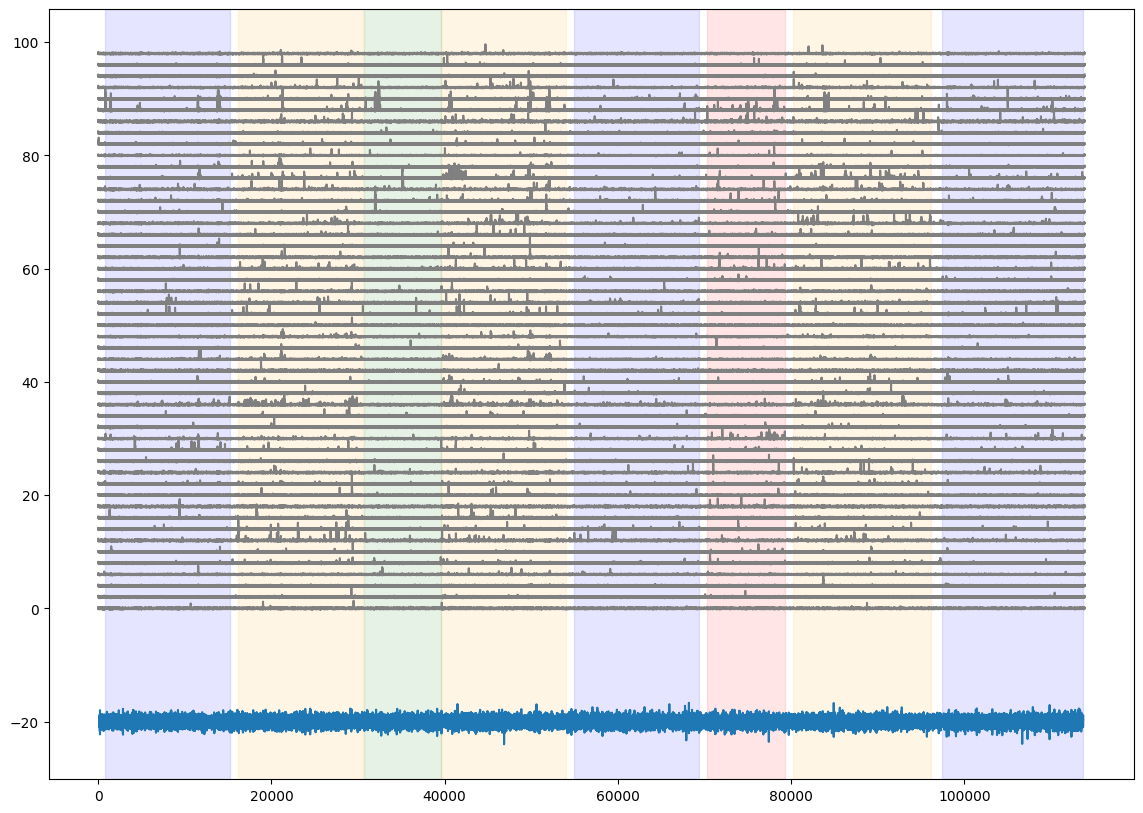

In [5]:
#get data
ts, dff = data_set.get_dff_traces()   # gets dff traces for all neurons - ts = timestamp
dxcm, tsd = data_set.get_running_speed()     #gets running speed of mouse in cm/s
stim_epoch = data_set.get_stimulus_epoch_table()    #gets dataframe of stimulus epochs

#create simple plot of the first 50 cells
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

#add the running speed
plt.plot((0.2*dxcm)-20)

#shade each stimulus epoch
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    print(stim_name, colors[c])
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

In [6]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')
natural_scene_table.head(10000) #default solo 5 immagini

,frame,start,end
0,67,16102,16109
1,44,16109,16116
2,41,16117,16124
3,47,16124,16131
4,0,16132,16139
...,...,...,...
5945,5,96069,96076
5946,55,96077,96084
5947,69,96084,96091
5948,113,96092,96099


Il numero di natural scenes è 5950. Proprio come per l'altro esperimento

###Responses

In [7]:
import pandas as pd
import numpy as np
import os

In [8]:
print(f"La shape della variabile 'events' è: {events.shape}")

La shape della variabile 'events' è: (90, 113866)


In [9]:
# Questo script serve a creare dei file .npy con la risposta neuronale media dei neuroni (a partire dai dati contenuti in events)
# per ogni stimolo (presente in stim_table), nei 15 frame successivi all’onset/avvio dello stimolo (immagine/video presentata al topo).
# I dati saranno salvati in una cartella specifica 'V1T/data/allen/501559087/data/responses' all'interno del V1T.

# --- A. Fase di Configurazione ---
# il FRAME di inizio (onset) della presentazione di ogni stimolo.
colonna_frame_inizio = 'start'

# Durata del periodo post-onset in CAMPIONI (frames) per l'aggregazione.
# 500ms a 30 Hz corrispondono a 15 campioni/frames.
numero_campioni_aggregazione = 15
cartella_salvataggio_risposte = '/content/V1T/data/allen/501559087/data/responses'

print(f"Aggregheremo la media degli eventi nei {numero_campioni_aggregazione} campioni (frames) dopo l'onset dello stimolo.")
print(f"Le risposte aggregate verranno salvate in file separati nella cartella: '{cartella_salvataggio_risposte}'")

# Puoi limitare il numero di stimoli da elaborare per test (es. i primi 5), se usiamo None significa tutti gli stimoli.
max_stimoli_da_elaborare = None

# --- B. Processo di elaborazione ---
print(f"\nInizio aggregazione e salvataggio delle risposte per gli stimoli...")

# 1. Verificare che events sia un array NumPy e stim_table un DataFrame
if not isinstance(events, np.ndarray):
    print("Errore: La variabile 'events' non è un array NumPy.")
elif not isinstance(stim_table, pd.DataFrame):
    print("Errore: La variabile 'stim_table' non è un DataFrame pandas.")
elif colonna_frame_inizio not in stim_table.columns:
     print(f"Errore: Colonna frame inizio ('{colonna_frame_inizio}') non trovata nella stim_table.")
     print("Colonne disponibili nella stim_table:", stim_table.columns.tolist())
else:
    print(f"Shape degli eventi: {events.shape}")
    print(f"La stim_table contiene {len(stim_table)} righe.")
    print(f"La lunghezza totale degli eventi (dimensione 1) è: {events.shape[1]}")

    # Inizializza il contatore per gli stimoli elaborati con successo
    stimoli_elaborati = 0

    # 2. Creare la cartella di salvataggio se non esiste
    if not os.path.exists(cartella_salvataggio_risposte):
        os.makedirs(cartella_salvataggio_risposte)
        print(f"\nCreata cartella di salvataggio per le risposte: '{cartella_salvataggio_risposte}'")
    else:
         print(f"\nLa cartella di salvataggio per le risposte '{cartella_salvataggio_risposte}' esiste già.")

    # 3. Iterare sulla stim_table, aggregare gli eventi e salvare ogni risposta
    num_stimoli_totali = len(stim_table)

    for i in range(num_stimoli_totali):
        if max_stimoli_da_elaborare is not None and stimoli_elaborati >= max_stimoli_da_elaborare:
            print(f"\nInterrotto dopo aver elaborato {max_stimoli_da_elaborare} stimoli.")
            break

        # Ottieni la riga corrente dalla stim_table
        riga_stimolo = stim_table.iloc[i]

        try:
            # Ottieni il frame di inizio dello stimolo
            frame_inizio = int(riga_stimolo[colonna_frame_inizio])

            # Calcola l'indice di inizio per il periodo di aggregazione (immediatamente dopo l'onset)
            # Assumiamo che il periodo inizi al frame di onset
            indice_inizio_aggregazione = frame_inizio

            # Calcola l'indice di fine per il periodo di aggregazione (pari all'indice iniziale più 15 frame)
            indice_fine_aggregazione = indice_inizio_aggregazione + numero_campioni_aggregazione

            # Assicura che gli indici siano validi e non superino i limiti dell'array events
            indice_inizio_aggregazione = max(0, indice_inizio_aggregazione) # Assicura che non sia negativo
            indice_fine_aggregazione = min(events.shape[1], indice_fine_aggregazione) # Assicura che non superi la lunghezza totale degli eventi

            # Seleziona il segmento di dati events per i 500ms post-onset (o il periodo disponibile)
            eventi_post_onset = events[:, indice_inizio_aggregazione:indice_fine_aggregazione]

            # 4. Calcola la media e salva il risultato se il segmento non è vuoto
            if eventi_post_onset.shape[1] > 0:
                risposta_aggregata = np.mean(eventi_post_onset, axis=1).astype(np.float32)

                # La shape di risposta_aggregata dovrebbe essere (174,)
                if risposta_aggregata.shape != (events.shape[0],): # Verifica che la shape sia (174,)
                    print(f"  Avviso: Shape aggregata inattesa {risposta_aggregata.shape} per lo stimolo {i}. Attesa shape ({events.shape[0]},). Non salvato.")
                    continue # Salta il salvataggio se la shape non è corretta

                # Definisce il nome del file di output per questo stimolo
                nome_file_output = f'{stimoli_elaborati}.npy' # Nome file basato sull'ordine di elaborazione
                percorso_file_output = os.path.join(cartella_salvataggio_risposte, nome_file_output)

                try:
                    # Salva il vettore di risposta aggregata
                    np.save(percorso_file_output, risposta_aggregata)

                    stimoli_elaborati += 1 # Incrementa il contatore solo se l'elaborazione e il salvataggio hanno successo
                    # print(f"  Elaborato e salvato stimolo {stimoli_elaborati}: '{nome_file_output}'. Risposta shape: {risposta_aggregata.shape}")
                    print(f"  Elaborato e salvato risp. per stimolo {stimoli_elaborati} (orig. idx {i}) in '{nome_file_output}'")

                except Exception as e:
                    print(f"  Errore durante il salvataggio della risposta aggregata per lo stimolo {i} a '{percorso_file_output}': {e}")

            else:
                 print(f"  Avviso: Segmento eventi post-onset vuoto per lo stimolo {i} (Indici [{indice_inizio_aggregazione}:{indice_fine_aggregazione}]). Salto.")

        except ValueError:
            print(f"  Errore: Valore non numerico nella colonna '{colonna_frame_inizio}' per lo stimolo {i}. Salto.")
        except Exception as e:
            print(f"  Errore generale durante l'elaborazione dello stimolo {i}: {e}")

# --- C. Risultati finali ---
print(f"\nProcesso completato. Elaborate e salvate risposte per {stimoli_elaborati} stimoli.")
print(f"Controlla la cartella '{cartella_salvataggio_risposte}' nel pannello File per i file 0.npy, 1.npy, etc.")


Output streaming troncato alle ultime 5000 righe.
  Elaborato e salvato risp. per stimolo 954 (orig. idx 953) in '953.npy'
  Elaborato e salvato risp. per stimolo 955 (orig. idx 954) in '954.npy'
  Elaborato e salvato risp. per stimolo 956 (orig. idx 955) in '955.npy'
  Elaborato e salvato risp. per stimolo 957 (orig. idx 956) in '956.npy'
  Elaborato e salvato risp. per stimolo 958 (orig. idx 957) in '957.npy'
  Elaborato e salvato risp. per stimolo 959 (orig. idx 958) in '958.npy'
  Elaborato e salvato risp. per stimolo 960 (orig. idx 959) in '959.npy'
  Elaborato e salvato risp. per stimolo 961 (orig. idx 960) in '960.npy'
  Elaborato e salvato risp. per stimolo 962 (orig. idx 961) in '961.npy'
  Elaborato e salvato risp. per stimolo 963 (orig. idx 962) in '962.npy'
  Elaborato e salvato risp. per stimolo 964 (orig. idx 963) in '963.npy'
  Elaborato e salvato risp. per stimolo 965 (orig. idx 964) in '964.npy'
  Elaborato e salvato risp. per stimolo 966 (orig. idx 965) in '965.npy'
 

In [10]:
# Questo è uno script di verifica : serve a caricare e ispezionare un file campione *.npy generato dallo script precedente.
cartella_risposte_aggregate = '/content/V1T/data/allen/501559087/data/responses'
nome_file_risposta_npy = '0.npy'
num_valori_iniziali_risposta = 5
percorso_file_risposta = os.path.join(cartella_risposte_aggregate, nome_file_risposta_npy)

print(f"Informazioni sul file di risposta aggregata: {nome_file_risposta_npy}")
print(f"  Percorso completo: {percorso_file_risposta}")

# Verifica se il file esiste
if os.path.exists(percorso_file_risposta):
    try:
        # Carica il file .npy
        risposta_data = np.load(percorso_file_risposta)

        print(f"  Shape dei dati di risposta: {risposta_data.shape}")
        print(f"  Tipo di dati (dtype): {risposta_data.dtype}")

        # Visualizza i valori iniziali
        if risposta_data.size > 0: # Controlla se l'array non è vuoto
            print(f"\nPrimi {min(num_valori_iniziali_risposta, risposta_data.size)} valori:")
            # Utilizziamo min() per evitare errori se l'array ha meno di num_valori_iniziali_risposta elementi
            print(risposta_data[:num_valori_iniziali_risposta])
        else:
            print("\nL'array caricato è vuoto.")

    except Exception as e:
        print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file_risposta_npy}: {e}")
else:
    print(f"Il file .npy '{nome_file_risposta_npy}' non trovato nella cartella '{cartella_risposte_aggregate}'.")

Informazioni sul file di risposta aggregata: 0.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/responses/0.npy
  Shape dei dati di risposta: (90,)
  Tipo di dati (dtype): float32

Primi 5 valori:
[0.         0.         0.         0.         0.00445936]


In [11]:
import os
import numpy as np

cartella = '/content/V1T/data/allen/501559087/data/responses'  # Cambia con il percorso giusto

file_npy = [f for f in os.listdir(cartella) if f.endswith('.npy')]
print(f"Trovati {len(file_npy)} file .npy in '{cartella}'")

file_con_nan = []

for nome_file in file_npy:
    percorso_file = os.path.join(cartella, nome_file)
    try:
        dati = np.load(percorso_file, allow_pickle=True)

        # Verifica presenza di NaN
        if np.isnan(dati).any():
            file_con_nan.append(nome_file)
            print(f"⚠️ '{nome_file}' contiene NaN. Sostituisco con 0...")

            # Sostituisco NaN con 0
            dati_senza_nan = np.nan_to_num(dati, nan=0.0)

            # Sovrascrivo il file
            np.save(percorso_file, dati_senza_nan)
        else:
            print(f"✅ '{nome_file}' non contiene NaN.")

    except Exception as e:
        print(f"❌ Errore con '{nome_file}': {e}")

print(f"\nOperazione completata. {len(file_con_nan)} file modificati con NaN sostituiti da 0.")

Output streaming troncato alle ultime 5000 righe.
✅ '3185.npy' non contiene NaN.
✅ '1629.npy' non contiene NaN.
✅ '5391.npy' non contiene NaN.
✅ '1426.npy' non contiene NaN.
✅ '3773.npy' non contiene NaN.
✅ '1116.npy' non contiene NaN.
✅ '1625.npy' non contiene NaN.
✅ '315.npy' non contiene NaN.
✅ '1920.npy' non contiene NaN.
✅ '3481.npy' non contiene NaN.
✅ '2696.npy' non contiene NaN.
✅ '1041.npy' non contiene NaN.
✅ '1843.npy' non contiene NaN.
✅ '839.npy' non contiene NaN.
✅ '663.npy' non contiene NaN.
✅ '5233.npy' non contiene NaN.
✅ '3616.npy' non contiene NaN.
✅ '5468.npy' non contiene NaN.
✅ '308.npy' non contiene NaN.
✅ '3431.npy' non contiene NaN.
✅ '1716.npy' non contiene NaN.
✅ '4595.npy' non contiene NaN.
✅ '5411.npy' non contiene NaN.
✅ '4854.npy' non contiene NaN.
✅ '2190.npy' non contiene NaN.
✅ '3422.npy' non contiene NaN.
✅ '596.npy' non contiene NaN.
✅ '3439.npy' non contiene NaN.
✅ '4270.npy' non contiene NaN.
✅ '4831.npy' non contiene NaN.
✅ '281.npy' non contiene 

---

###Images

In [12]:
# Questa riga di codice carica le immagini effettive degli stimoli che sono state mostrate al topo durante l’esperimento contenuto nel Dataset.
# Le immagini estratte sono filtrate e riguardano solo "scene naturali"(es. foreste, paesaggi, ecc.), non forme geometriche o pattern artificiali.

# Output è un oggetto simile a un array NumPy 3D: una sorta di griglia di immagini.
# Questo restituisce un array NumPy di shape (N, H, W), dove:
# N = numero di immagini (es. 118 immagini)
# H e W = altezza e larghezza di ogni immagine (tipicamente 255x255 pixel)
# Ogni immagine è in scala di grigi (valori da 0 a 255 o 0.0 a 1.0)
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [13]:
# Questo script serve a salvare su disco le immagini degli stimoli natural_scenes nello stesso ordine in cui sono stati presentati al topo.
# Otterremo una cartella con files :

# original_dimension_ordered_images/
# +-- 0.npy
# +-- 1.npy
# +-- 2.npy
# ...

# Ogni file rappresenta un’immagine mostrata al topo, nell’ordine temporale esatto.
# È molto utile se dobbiamo : allineare stimoli e risposte neuronali per fare training di modelli neurali (con stimolo come input).

# --- A. Fase di Configurazione ---
cartella_output_ordinati = 'original_dimension_ordered_images'
# Recupera la tabella degli stimoli (img, video ...) 'natural_scenes' in ordine temporale
natural_scene_table = data_set.get_stimulus_table('natural_scenes')
# Recupera i template delle immagini 'natural_scenes' : qui otteniamo le immagini uniche.
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

# --- B. Processo di elaborazione ---
print("Inizio raccolta e salvataggio delle immagini nell'ordine della tabella degli stimoli...")

# 1. Verificare che le variabili necessarie esistano e siano del tipo corretto
if not isinstance(natural_scene_table, pd.DataFrame):
    print("Errore: La variabile 'natural_scene_table' non è un DataFrame pandas.")
elif not isinstance(natural_scene_template, np.ndarray):
    print("Errore: La variabile 'natural_scene_template' non è un array NumPy.")
else:
    print(f"Caricata 'natural_scene_table' con {len(natural_scene_table)} righe.")
    print(f"Caricato 'natural_scene_template' con shape: {natural_scene_template.shape}")

    # Verifica che la colonna 'frame' sia presente nella tabella degli stimoli
    if 'frame' not in natural_scene_table.columns:
         print("Errore: Colonna 'frame' non trovata nella 'natural_scene_table'.")
         print("Colonne disponibili nella 'natural_scene_table':", natural_scene_table.columns.tolist())
    else:
        # 2. Creare la cartella di output se non esiste
        if not os.path.exists(cartella_output_ordinati):
            os.makedirs(cartella_output_ordinati)
            print(f"\nCreata cartella di output: '{cartella_output_ordinati}'")
        else:
            print(f"\nLa cartella di output '{cartella_output_ordinati}' esiste già.")

        # 3. Scorrere la tabella degli stimoli e salvare l'immagine corrispondente
        num_stimoli_totali = len(natural_scene_table)
        immagini_salvate = 0

        # Qui usiamo enumerate per ottenere sia l'indice (per il nome del file) che la riga
        for i, riga_stimolo in natural_scene_table.iterrows():

            try:
                # La colonna 'frame' nella stimulus_table per 'natural_scenes'
                # si riferisce all'indice dell'immagine nel 'natural_scene_template'.
                # Questo è il mapping chiave per ordinare le immagini.
                indice_template_immagine = int(riga_stimolo['frame'])

                # Verifica che l'indice sia valido per natural_scene_template
                if 0 <= indice_template_immagine < natural_scene_template.shape[0]:
                    # Estrae la singola immagine dal template usando l'indice
                    immagine_corrente = natural_scene_template[indice_template_immagine, :, :]

                    # Definisce il nome del file per questa immagine nell'ordine di presentazione
                    # Usiamo l'indice del ciclo (i) per garantire l'ordine
                    nome_file_output = f'{i}.npy' # Esempio: 0.npy, 1.npy, ...
                    percorso_salvataggio = os.path.join(cartella_output_ordinati, nome_file_output)

                    # Salva l'array della singola immagine come file .npy
                    np.save(percorso_salvataggio, immagine_corrente)

                    immagini_salvate += 1

                else:
                     print(f"  Avviso: Indice template immagine non valido ({indice_template_immagine}) per lo stimolo {i}. Salto.")

            except KeyError:
                print(f"  Errore: Colonna 'frame' non trovata per lo stimolo {i}. Salto.")
            except ValueError:
                print(f"  Errore: Valore non numerico nella colonna 'frame' per lo stimolo {i}. Salto.")
            except Exception as e:
                print(f"  Errore generico durante l'elaborazione o il salvataggio dello stimolo {i}: {e}")


# --- C. Risultati finali ---
print(f"\nProcesso completato. Salvate {immagini_salvate} immagini nella cartella '{cartella_output_ordinati}', ordinate secondo la tabella degli stimoli.")
print(f"Controlla la cartella '{cartella_output_ordinati}' nel pannello File per i file da 0.npy a {immagini_salvate-1:04d}.npy.")

Inizio raccolta e salvataggio delle immagini nell'ordine della tabella degli stimoli...
Caricata 'natural_scene_table' con 5950 righe.
Caricato 'natural_scene_template' con shape: (118, 918, 1174)

Creata cartella di output: 'original_dimension_ordered_images'
  Avviso: Indice template immagine non valido (-1) per lo stimolo 35. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 135. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 167. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 231. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 276. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 370. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 612. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 818. Salto.
  Avviso: Indice template immagine non valido (-1) per lo stimolo 860. Salto.
  Avviso: Indice template immagine non

In [14]:
# Questo script serve a creare e salvare delle immagini “finte” completamente grigie che sostituiscono alcuni stimoli reali.
# È utile, ad esempio, quando vuoi controllare l’effetto di uno stimolo neutro (grigio) al posto dello stimolo originale
# , mantenendo però lo stesso formato e dimensione.

# --- A. Fase di Configurazione ---
# Lista degli indici degli stimoli per cui generare l'immagine di grigio
indici_stimolo = [
    35, 135, 167, 231, 276, 370, 612, 818, 860, 883, 1233, 1258, 1294, 1306, 1432, 1583, 1855, 1946, 2120, 2138, 2386, 2396, 2736, 2944, 2964, 3261, 3554, 3674, 3788, 3857, 4182, 4415, 4568, 4650, 4721, 4779, 4839, 4996, 5076, 5109, 5153, 5195, 5333, 5450, 5547, 5627, 5647, 5786, 5917, 5928
]

# Dimensioni desiderate per le immagini (altezza x larghezza)
altezza = 918
larghezza = 1174

# Valore del pixel per il grigio intermedio (tra 0 e 255)
# Il valore intermedio esatto tra 0 e 255 è 127.5.
# Per un array di tipo intero (es. uint8), si arrotonda a 127 o 128. Usiamo 128 per semplicità.
valore_grigio = 128

# Tipo di dato per i pixel (uint8 è comune per immagini in scala di grigi 0-255)
tipo_dato = np.uint8

# Specifica la cartella dove salvare i file .npy
# Assicuriamoci che il nome della cartella sia quello desiderato
cartella_output_grigio = 'original_dimension_ordered_images' # <--- Specifica la tua cartella


# --- B. Processo di elaborazione ---
print(f"Inizio generazione e salvataggio delle immagini di grigio per {len(indici_stimolo)} stimoli...")

# 1. Creare la cartella di output se non esiste
if not os.path.exists(cartella_output_grigio):
    os.makedirs(cartella_output_grigio)
    print(f"\nCreata cartella di output: '{cartella_output_grigio}'")
else:
    print(f"\nLa cartella di output '{cartella_output_grigio}' esiste già.")

# 2. Generare e salvare l'immagine di grigio per ogni indice di stimolo
immagini_salvate = 0

for indice in indici_stimolo:
    try:
        # Crea un array NumPy con le dimensioni specificate e riempito con il valore di grigio
        # e con il tipo di dato specificato.
        immagine_grigio = np.full((altezza, larghezza), valore_grigio, dtype=tipo_dato)

        # Definisce il nome del file di output
        # Il nome del file sarà l'indice dello stimolo con estensione .npy
        nome_file_output = f'{indice}.npy'
        percorso_salvataggio = os.path.join(cartella_output_grigio, nome_file_output)

        # Salva l'array dell'immagine di grigio come file .npy
        np.save(percorso_salvataggio, immagine_grigio)

        immagini_salvate += 1
        print(f"  Generata e salvata immagine di grigio per stimolo {indice} in '{nome_file_output}'")

    except Exception as e:
        print(f"  Errore durante la generazione o il salvataggio dell'immagine per l'indice {indice}: {e}")


# --- C. Risultati finali ---
print(f"\nProcesso completato. Generate e salvate {immagini_salvate} immagini di grigio nella cartella '{cartella_output_grigio}'.")
print(f"Controlla la cartella '{cartella_output_grigio}' nel pannello File per i file .npy con gli indici degli stimoli.")

Inizio generazione e salvataggio delle immagini di grigio per 50 stimoli...

La cartella di output 'original_dimension_ordered_images' esiste già.
  Generata e salvata immagine di grigio per stimolo 35 in '35.npy'
  Generata e salvata immagine di grigio per stimolo 135 in '135.npy'
  Generata e salvata immagine di grigio per stimolo 167 in '167.npy'
  Generata e salvata immagine di grigio per stimolo 231 in '231.npy'
  Generata e salvata immagine di grigio per stimolo 276 in '276.npy'
  Generata e salvata immagine di grigio per stimolo 370 in '370.npy'
  Generata e salvata immagine di grigio per stimolo 612 in '612.npy'
  Generata e salvata immagine di grigio per stimolo 818 in '818.npy'
  Generata e salvata immagine di grigio per stimolo 860 in '860.npy'
  Generata e salvata immagine di grigio per stimolo 883 in '883.npy'
  Generata e salvata immagine di grigio per stimolo 1233 in '1233.npy'
  Generata e salvata immagine di grigio per stimolo 1258 in '1258.npy'
  Generata e salvata im

Tentativo di visualizzare l'immagine dal file: 35.npy
  Percorso completo: original_dimension_ordered_images/35.npy


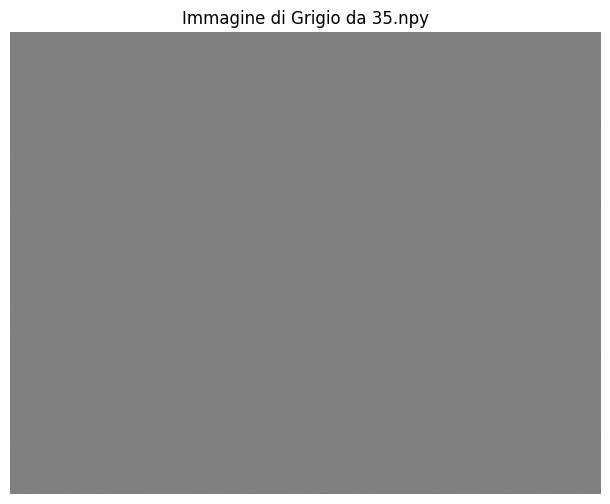

  Immagine visualizzata con successo.


In [15]:
# Questo script serve a caricare e visualizzare una singola immagine campione (1036.npy) salvata in formato .npy utilizzando matplotlib.

# --- A. Fase di Configurazione ---
cartella_immagini_grigio = 'original_dimension_ordered_images'
nome_file_grigio_npy = '35.npy'

# --- B. Caricamento e visualizzazione ---
percorso_file = os.path.join(cartella_immagini_grigio, nome_file_grigio_npy)

print(f"Tentativo di visualizzare l'immagine dal file: {nome_file_grigio_npy}")
print(f"  Percorso completo: {percorso_file}")

# Verifica se il file esiste
if os.path.exists(percorso_file):
    try:
        # Carica il file .npy
        img_data = np.load(percorso_file)

        # Verifica che l'array sia 2D (altezza, larghezza) per la visualizzazione in scala di grigi
        if img_data.ndim == 2:
            # Crea la figura e gli assi per il plot
            plt.figure(figsize=(8, 6)) # Puoi aggiustare le dimensioni della figura

            # Mostra l'immagine in scala di grigi
            # 'gray' o 'Greys_r' sono colormaps adatti per immagini in scala di grigi
            plt.imshow(img_data, cmap='gray', vmin=0, vmax=255)

            # Aggiunge un titolo e disattiva gli assi se non necessari
            plt.title(f'Immagine di Grigio da {nome_file_grigio_npy}')
            plt.axis('off') # Disattiva gli assi

            # Mostra il plot
            plt.show()

            print(f"  Immagine visualizzata con successo.")

        elif img_data.ndim == 3 and img_data.shape[2] in [3, 4]:
             print(f"  Il file '{nome_file_grigio_npy}' sembra essere un'immagine a colori ({img_data.shape}). Visualizzazione come RGB/RGBA.")
             try:
                 # Per immagini a colori, imshow funziona direttamente con (H, W, C)
                 plt.figure(figsize=(8, 6))
                 # Se i dati non sono uint8 e nel range 0-255, potrebbero dover essere normalizzati
                 if img_data.dtype != np.uint8:
                     print("  Avviso: I dati non sono uint8. Potrebbe essere necessaria la normalizzazione per la visualizzazione corretta.")
                 else:
                     plt.imshow(img_data)

                 plt.title(f'Immagine a Colori da {nome_file_grigio_npy}')
                 plt.axis('off')
                 plt.show()
             except Exception as e:
                 print(f"  Errore durante la visualizzazione dell'immagine a colori: {e}")
        else:
            print(f"  La shape dell'array ({img_data.shape}) non è adatta per la visualizzazione standard come immagine 2D o 3D.")

    except FileNotFoundError:
        print(f"Errore: File .npy non trovato al percorso '{percorso_file}'.")
    except Exception as e:
        print(f"Errore durante il caricamento o la preparazione per la visualizzazione di {nome_file_grigio_npy}: {e}")
else:
    print(f"Il file .npy '{nome_file_grigio_npy}' non trovato nella cartella '{cartella_immagini_grigio}'.")

In [16]:
# Questo script ha lo scopo di caricare un file *.npy campione (0.npy) che rappresenta un'immagine (precedentemente salvata con NumPy)
# e di stamparne informazioni utili come dimensioni, tipo di dato e contenuto iniziale.

# --- A. Fase di Configurazione ---
cartella_immagini_salvate = 'original_dimension_ordered_images'
nome_file_immagine_npy = '0.npy'

# --- B. Caricamento e visualizzazione ---
percorso_file = os.path.join(cartella_immagini_salvate, nome_file_immagine_npy)

# Verifica se il file esiste
if os.path.exists(percorso_file):
    try:
        # Carica il file .npy
        img_data = np.load(percorso_file)

        print(f"Informazioni sul file immagine .npy: {nome_file_immagine_npy}")
        print(f"  Percorso completo: {percorso_file}")
        print(f"  Shape dei dati dell'immagine: {img_data.shape}")
        print(f"  Tipo di dati (dtype) dei pixel: {img_data.dtype}")

    except FileNotFoundError:
        print(f"Errore: File .npy non trovato al percorso '{percorso_file}'.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file .npy {nome_file_immagine_npy}: {e}")
else:
    print(f"Il file .npy '{nome_file_immagine_npy}' non trovato nella cartella '{cartella_immagini_salvate}'.")

Informazioni sul file immagine .npy: 0.npy
  Percorso completo: original_dimension_ordered_images/0.npy
  Shape dei dati dell'immagine: (918, 1174)
  Tipo di dati (dtype) dei pixel: float32


L'immagine 0.npy ha dimensioni `918x1174`

Tentativo di visualizzare l'immagine dal file: 0.npy
  Percorso completo: original_dimension_ordered_images/0.npy
  Shape dei dati dell'immagine: (918, 1174)
  Tipo di dati (dtype): float32


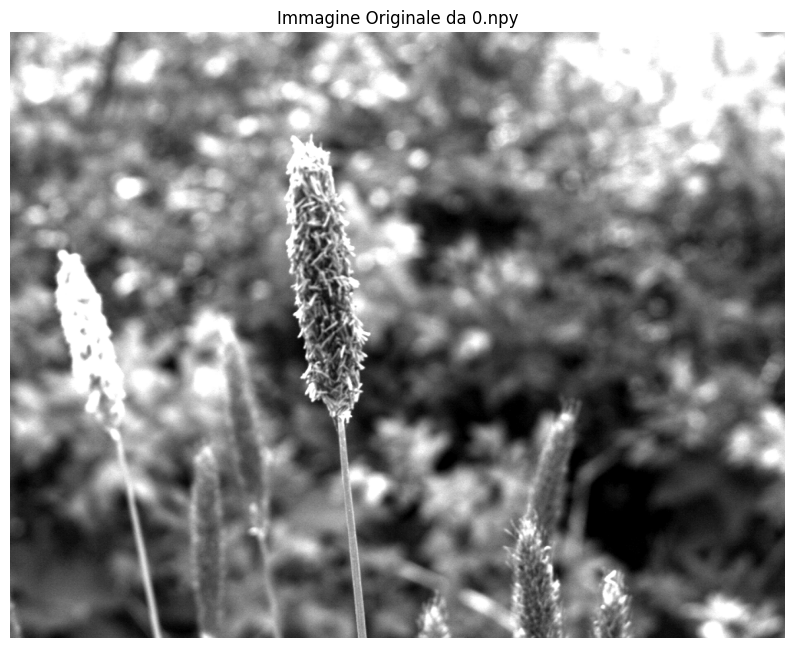

  Immagine visualizzata con successo.


In [17]:
# Questo script ha lo scopo di mostrare sullo schermo una specifica immagine .npy
# in scala di grigi o a colori, per verificare visivamente il contenuto.

# --- A. Fase di Configurazione ---
cartella_immagini_originali = 'original_dimension_ordered_images'
nome_file_immagine_npy = '0.npy'

# --- B. Caricamento e visualizzazione ---
percorso_file = os.path.join(cartella_immagini_originali, nome_file_immagine_npy)
print(f"Tentativo di visualizzare l'immagine dal file: {nome_file_immagine_npy}")
print(f"  Percorso completo: {percorso_file}")

# Verifica se il file esiste
if os.path.exists(percorso_file):
    try:
        # Carica il file .npy
        img_data = np.load(percorso_file)

        # Verifica che l'array sia 2D (altezza, larghezza) per la visualizzazione in scala di grigi
        # Le immagini Allen sono tipicamente in scala di grigi
        if img_data.ndim == 2:
            print(f"  Shape dei dati dell'immagine: {img_data.shape}")
            print(f"  Tipo di dati (dtype): {img_data.dtype}")

            # Crea la figura e gli assi per il plot
            plt.figure(figsize=(10, 8)) # Puoi aggiustare le dimensioni della figura per l'immagine più grande

            # Mostra l'immagine in scala di grigi
            # 'gray' o 'Greys_r' sono colormaps adatti per immagini in scala di grigi
            # Assumendo che i dati siano nel range 0-255 (comune per uint8)
            plt.imshow(img_data, cmap='gray', vmin=0, vmax=255)

            # Aggiungi un titolo e disattiva gli assi se non necessari
            plt.title(f'Immagine Originale da {nome_file_immagine_npy}')
            plt.axis('off') # Disattiva gli assi

            # Mostra il plot
            plt.show()

            print(f"  Immagine visualizzata con successo.")

        elif img_data.ndim == 3 and img_data.shape[2] in [3, 4]:
             print(f"  Il file '{nome_file_immagine_npy}' sembra essere un'immagine a colori ({img_data.shape}). Visualizzazione come RGB/RGBA.")
             try:
                 # Per immagini a colori, imshow funziona direttamente con (H, W, C)
                 plt.figure(figsize=(10, 8)) # Aggiusta la dimensione
                 # Se i dati non sono uint8 e nel range 0-255, potrebbero dover essere normalizzati
                 if img_data.dtype != np.uint8:
                     print("  Avviso: I dati non sono uint8. Potrebbe essere necessaria la normalizzazione per la visualizzazione corretta.")
                 else:
                     plt.imshow(img_data)

                 plt.title(f'Immagine a Colori da {nome_file_immagine_npy}')
                 plt.axis('off')
                 plt.show()
             except Exception as e:
                 print(f"  Errore durante la visualizzazione dell'immagine a colori: {e}")

        else:
            print(f"  La shape dell'array ({img_data.shape}) non è adatta per la visualizzazione standard come immagine 2D o 3D.")

    except FileNotFoundError:
        print(f"Errore: File .npy non trovato al percorso '{percorso_file}'.")
    except Exception as e:
        print(f"Errore durante il caricamento o la preparazione per la visualizzazione di {nome_file_immagine_npy}: {e}")
else:
    print(f"Il file .npy '{nome_file_immagine_npy}' non trovato nella cartella '{cartella_immagini_originali}'.")

In [18]:
# Questo script ridimensiona le immagini *.npy di dimensioni 918x1174 pixel (è la dimensione delle img Allen)
# precedentemente salvate in una cartella temporanea in un formato compatibile col modello V1T che è (144, 256).
# Il ridimensionamento è fatto mediante la libreria PIL attraverso una conversione temporanea
# e riguarda sia immagini a colori che in scala di grigio.
from PIL import Image

# --- A. Fase di Configurazione ---
cartella_origine_immagini = 'original_dimension_ordered_images'
cartella_output = '/content/V1T/data/allen/501559087/data/images'

# Definisci le dimensioni target per il tuo modello V1T
altezza_target = 144
larghezza_target = 256
dimensioni_target = (larghezza_target, altezza_target) # La libreria Pillow si aspetta (larghezza, altezza)

# Puoi limitare il numero di immagini da elaborare per test (es. prime 10). Se None significa tutte.
max_immagini_da_elaborare = None

# --- B. Processo di elaborazione ---
print("Inizio elaborazione di tutte le immagini...")

# 1. Verificare che la cartella di origine esista
if not os.path.isdir(cartella_origine_immagini):
    print(f"Errore: La cartella di origine '{cartella_origine_immagini}' non esiste.")
else:
    # 2. Creare la cartella di output se non esiste
    if not os.path.exists(cartella_output):
        os.makedirs(cartella_output)
        print(f"\nCreata cartella di output: '{cartella_output}'")
    else:
        print(f"\nLa cartella di output '{cartella_output}' esiste già.")

    # 3. Ottenere la lista dei file .npy nella cartella di origine
    # Filtriamo solo i file che terminano con .npy
    lista_file_immagini = [f for f in os.listdir(cartella_origine_immagini) if f.endswith('.npy')]
    lista_file_immagini.sort() # Ordina i file per assicurare un ordine coerente

    num_immagini_totali = len(lista_file_immagini)
    print(f"\nTrovati {num_immagini_totali} file .npy nella cartella di origine.")

    if num_immagini_totali == 0:
        print("Nessun file .npy trovato nella cartella di origine.")
    else:
        # 4. Scorrere i file, elaborarli e salvarli
        immagini_elaborate = 0
        for i, nome_file_origine in enumerate(lista_file_immagini):
            if max_immagini_da_elaborare is not None and immagini_elaborate >= max_immagini_da_elaborare:
                print(f"\nInterrotto dopo aver elaborato {max_immagini_da_elaborare} immagini.")
                break

            percorso_file_origine = os.path.join(cartella_origine_immagini, nome_file_origine)
            nome_file_output = nome_file_origine # Esempio di nome file di output
            percorso_file_output = os.path.join(cartella_output, nome_file_output)

            print(f"\nElaborazione immagine {i+1}/{num_immagini_totali}: {nome_file_origine}")
            print(f"  Percorso origine: {percorso_file_origine}")

            # Evita di rielaborare file già esistenti nella cartella di output (opzionale)
            if os.path.exists(percorso_file_output):
                 print(f"  File di output '{nome_file_output}' esiste già. Salto elaborazione.")
                 immagini_elaborate += 1 # Conta anche i file saltati se vuoi il conteggio totale di quelli "gestiti"
                 continue # Passa all'immagine successiva

            try:
                # 4a. Carica l'immagine .npy originale
                img_data_originale = np.load(percorso_file_origine)

                # Verifica che l'immagine caricata abbia le dimensioni attese dell'Allen
                # Puoi rimuovere questo controllo se le shape variano o non ti interessa
                if img_data_originale.shape != (918, 1174):
                    print(f"  Avviso: Shape caricata ({img_data_originale.shape}) diversa da (918, 1174).")

                # 4b. Converti l'array NumPy in un oggetto immagine di Pillow per il ridimensionamento
                if img_data_originale.ndim == 2:
                     try:
                        # Prova conversione diretta in uint8
                        img_pil = Image.fromarray(img_data_originale.astype(np.uint8), 'L')

                     except Exception as e:
                         print(f"  Errore nella conversione in uint8 per {nome_file_origine}: {e}. Prova ad adattare il dtype o normalizzare.")
                         # Fallback: prova a usare float32 se Pillow lo supporta per il ridimensionamento
                         try:
                             img_pil = Image.fromarray(img_data_originale, 'F') # 'F' mode per float32
                             print(f"  Tentativo di ridimensionamento con dtype float32 per {nome_file_origine}.")
                         except Exception as e_float:
                             print(f"  Impossibile convertire in PIL Image per {nome_file_origine}: {e_float}. Salto elaborazione.")
                             img_pil = None # Impedisce i passaggi successivi

                # Gestisci immagini a colori se necessario
                elif img_data_originale.ndim == 3 and img_data_originale.shape[2] in [3, 4]:
                     try:
                         img_pil = Image.fromarray(img_data_originale.astype(np.uint8)) # Converti in uint8 per Pillow
                     except Exception as e:
                         print(f"  Errore nella conversione immagine a colori in uint8 per {nome_file_origine}: {e}. Salto elaborazione.")
                         img_pil = None
                else:
                    print(f"  Shape dell'immagine inattesa per la conversione PIL ({img_data_originale.shape}) per {nome_file_origine}. Salto elaborazione.")
                    img_pil = None

                if img_pil:
                    # 4c. Ridimensiona l'immagine
                    img_ridimensionata_pil = img_pil.resize(dimensioni_target, Image.Resampling.LANCZOS)
                    # print(f"  Dimensioni ridimensionate (Width, Height): {img_ridimensionata_pil.size}") # Opzionale

                    # 4d. Converti l'immagine ridimensionata di Pillow in un array NumPy
                    img_data_ridimensionata = np.array(img_ridimensionata_pil)
                    # print(f"  Shape ridimensionata (NumPy): {img_data_ridimensionata.shape}") # Opzionale

                    # 4e. Aggiungi la dimensione del batch (1) all'inizio
                    img_data_con_batch = np.expand_dims(img_data_ridimensionata, axis=0)
                    # print(f"  Shape finale per il modello (con batch=1): {img_data_con_batch.shape}") # Opzionale

                    # 4f. Salva l'immagine elaborata come file .npy
                    np.save(percorso_file_output, img_data_con_batch)

                    immagini_elaborate += 1 # Conta solo le immagini elaborate e salvate con successo
                    print(f"  Elaborata e salvata con successo: '{nome_file_output}'")

            except FileNotFoundError:
                print(f"  Errore: File .npy di origine non trovato: '{percorso_file_origine}'.")
            except Exception as e:
                print(f"  Errore generico durante l'elaborazione o il salvataggio di '{nome_file_origine}': {e}")

# --- C. Risultati finali ---
print(f"\nProcesso completato. Elaborate e salvate {immagini_elaborate} immagini nella cartella '{cartella_output}'.")
print(f"Controlla la cartella '{cartella_output}' nel pannello File.")

Inizio elaborazione di tutte le immagini...

Creata cartella di output: '/content/V1T/data/allen/501559087/data/images'

Trovati 5950 file .npy nella cartella di origine.

Elaborazione immagine 1/5950: 0.npy
  Percorso origine: original_dimension_ordered_images/0.npy
  Elaborata e salvata con successo: '0.npy'

Elaborazione immagine 2/5950: 1.npy
  Percorso origine: original_dimension_ordered_images/1.npy
  Elaborata e salvata con successo: '1.npy'

Elaborazione immagine 3/5950: 10.npy
  Percorso origine: original_dimension_ordered_images/10.npy
  Elaborata e salvata con successo: '10.npy'

Elaborazione immagine 4/5950: 100.npy
  Percorso origine: original_dimension_ordered_images/100.npy
  Elaborata e salvata con successo: '100.npy'

Elaborazione immagine 5/5950: 1000.npy
  Percorso origine: original_dimension_ordered_images/1000.npy
  Elaborata e salvata con successo: '1000.npy'

Elaborazione immagine 6/5950: 1001.npy
  Percorso origine: original_dimension_ordered_images/1001.npy
  E

/tmp/ipython-input-18-4154077339.py:77: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_pil = Image.fromarray(img_data_originale.astype(np.uint8), 'L')


Output streaming troncato alle ultime 5000 righe.
  Elaborata e salvata con successo: '5228.npy'

Elaborazione immagine 4702/5950: 5229.npy
  Percorso origine: original_dimension_ordered_images/5229.npy
  Elaborata e salvata con successo: '5229.npy'

Elaborazione immagine 4703/5950: 523.npy
  Percorso origine: original_dimension_ordered_images/523.npy
  Elaborata e salvata con successo: '523.npy'

Elaborazione immagine 4704/5950: 5230.npy
  Percorso origine: original_dimension_ordered_images/5230.npy
  Elaborata e salvata con successo: '5230.npy'

Elaborazione immagine 4705/5950: 5231.npy
  Percorso origine: original_dimension_ordered_images/5231.npy
  Elaborata e salvata con successo: '5231.npy'

Elaborazione immagine 4706/5950: 5232.npy
  Percorso origine: original_dimension_ordered_images/5232.npy
  Elaborata e salvata con successo: '5232.npy'

Elaborazione immagine 4707/5950: 5233.npy
  Percorso origine: original_dimension_ordered_images/5233.npy
  Elaborata e salvata con successo:

In [19]:
# Questo script serve a fare una verifica semplice su una singola immagine campione *.npy già ridimensionata :
# controlla che sia corretta e pronta per l'uso nel modello. Stampa: shape, tipo ...

cartella_immagini_elaborate = '/content/V1T/data/allen/501559087/data/images'
nome_file_elaborato_npy = '0.npy'

# --- Processo di elaborazione ---
percorso_file_elaborato = os.path.join(cartella_immagini_elaborate, nome_file_elaborato_npy)

print(f"Verifica della shape del file elaborato: {nome_file_elaborato_npy}")
print(f"  Percorso completo: {percorso_file_elaborato}")

# Verifica se il file esiste
if os.path.exists(percorso_file_elaborato):
    try:
        # Carica il file .npy elaborato
        img_data_elaborata = np.load(percorso_file_elaborato)

        # Visualizza la shape
        print(f"  Shape dei dati dell'immagine elaborata: {img_data_elaborata.shape}")
        print(f"  Tipo di dati (dtype): {img_data_elaborata.dtype}")

    except FileNotFoundError:
        print(f"  Errore: File .npy elaborato non trovato al percorso '{percorso_file_elaborato}'.")
    except Exception as e:
        print(f"  Errore durante il caricamento del file .npy elaborato {nome_file_elaborato_npy}: {e}")
else:
    print(f"Il file .npy elaborato '{nome_file_elaborato_npy}' non trovato nella cartella '{cartella_immagini_elaborate}'.")

Verifica della shape del file elaborato: 0.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/images/0.npy
  Shape dei dati dell'immagine elaborata: (1, 144, 256)
  Tipo di dati (dtype): uint8


L'immagine 0.npy ha dimensioni `144x256`

Tentativo di visualizzare l'immagine dal file: 0.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/images/0.npy
  Shape dei dati dell'immagine elaborata: (1, 144, 256)
  Tipo di dati (dtype): uint8
  Shape dei dati per la visualizzazione (dopo np.squeeze): (144, 256)


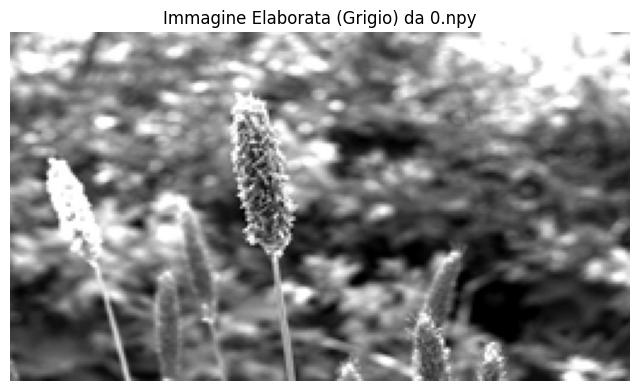

  Immagine in scala di grigi visualizzata con successo.


In [20]:
# Lo scopo di questo script è caricare un'immagine campione (0.npy) salvata in formato *.npy,
# e già ridimensionata, per visualizzarla usando la libreria matplotlib.

# --- A. Fase di Configurazione ---
cartella_immagini_elaborate = '/content/V1T/data/allen/501559087/data/images'
nome_file_elaborato_npy = '0.npy'

# --- B. Caricamento e visualizzazione ---
percorso_file_elaborato = os.path.join(cartella_immagini_elaborate, nome_file_elaborato_npy)

print(f"Tentativo di visualizzare l'immagine dal file: {nome_file_elaborato_npy}")
print(f"  Percorso completo: {percorso_file_elaborato}")

# Verifica se il file esiste
if os.path.exists(percorso_file_elaborato):
    try:
        # Carica il file .npy elaborato
        img_data_elaborata = np.load(percorso_file_elaborato)

        print(f"  Shape dei dati dell'immagine elaborata: {img_data_elaborata.shape}")
        print(f"  Tipo di dati (dtype): {img_data_elaborata.dtype}")

        # Per visualizzare l'immagine, dobbiamo rimuovere la dimensione del batch
        # Assumiamo che la shape sia (1, altezza, larghezza) o (1, altezza, larghezza, canali)
        if img_data_elaborata.ndim >= 3 and img_data_elaborata.shape[0] == 1:
            # Rimuovi la prima dimensione (quella del batch)
            img_data_visualizzabile = np.squeeze(img_data_elaborata, axis=0)

            print(f"  Shape dei dati per la visualizzazione (dopo np.squeeze): {img_data_visualizzabile.shape}")

            # Ora l'array dovrebbe essere 2D o 3D e possiamo visualizzarlo
            if img_data_visualizzabile.ndim == 2:
                # Immagine in scala di grigi 2D (altezza, larghezza)
                plt.figure(figsize=(8, 6))
                plt.imshow(img_data_visualizzabile, cmap='gray', vmin=0, vmax=255)
                plt.title(f'Immagine Elaborata (Grigio) da {nome_file_elaborato_npy}')
                plt.axis('off')
                plt.show()
                print(f"  Immagine in scala di grigi visualizzata con successo.")

            elif img_data_visualizzabile.ndim == 3 and img_data_visualizzabile.shape[2] in [3, 4]:
                 # Immagine a colori 3D (altezza, larghezza, canali)
                 print(f"  Il file sembra essere un'immagine a colori dopo squeeze ({img_data_visualizzabile.shape}).")
                 try:
                      plt.figure(figsize=(8, 6))
                      # Se i dati non sono uint8 e nel range 0-255, potrebbe essere necessaria la normalizzazione
                      if img_data_visualizzabile.dtype != np.uint8:
                          print("  Avviso: Dati non uint8. Potrebbe essere necessaria normalizzazione per RGB.")
                      else:
                           plt.imshow(img_data_visualizzabile)

                      plt.title(f'Immagine Elaborata (Colore) da {nome_file_elaborato_npy}')
                      plt.axis('off')
                      plt.show()
                      print(f"  Immagine a colori visualizzata con successo.")

                 except Exception as e:
                     print(f"  Errore durante la visualizzazione dell'immagine a colori dopo squeeze: {e}")

            else:
                print(f"  Shape non supportata per la visualizzazione dopo np.squeeze ({img_data_visualizzabile.shape}).")

        else:
            print(f"  Shape dell'array elaborato inattesa per la visualizzazione ({img_data_elaborata.shape}). Si attendeva una dimensione di batch iniziale.")


    except FileNotFoundError:
        print(f"  Errore: File .npy elaborato non trovato al percorso '{percorso_file_elaborato}'.")
    except Exception as e:
        print(f"  Errore durante il caricamento o la preparazione per la visualizzazione di {nome_file_elaborato_npy}: {e}")
else:
    print(f"Il file .npy elaborato '{nome_file_elaborato_npy}' non trovato nella cartella '{cartella_immagini_elaborate}'.")

---

###Behavior

Elaboriamo i dati sulla corsa, dimensione della pupilla e pupil center

In [21]:
# --- A. Fase di Configurazione ---
import os
import numpy as np
import pandas as pd

# Percorso dove salvare i comportamenti
cartella_output_comportamenti_allen = '/content/V1T/data/allen/501559087/data/behavior'

# Recupera i dati comportamentali
dxcm, tsd = data_set.get_running_speed()
time_pupil, pupil_size = data_set.get_pupil_size()
time_center, pupil_location = data_set.get_pupil_location()

# --- B. Processo di elaborazione ---
print("Inizio creazione e salvataggio dei file di comportamento Allen (velocità, pupilla)...")

# Controlli preliminari
if not isinstance(natural_scene_table, pd.DataFrame):
    raise ValueError("natural_scene_table non è un DataFrame.")
if dxcm is None or pupil_size is None or pupil_location is None:
    raise ValueError("Dati comportamentali non caricati correttamente.")

# Crea cartella se non esiste
os.makedirs(cartella_output_comportamenti_allen, exist_ok=True)

# Parametri
num_stimoli_totali = len(natural_scene_table)
comportamenti_salvati = 0
max_stimoli_da_elaborare = None  # oppure metti un numero per test

# Ciclo sui singoli stimoli
for i, riga_stimolo in natural_scene_table.iterrows():
    if max_stimoli_da_elaborare is not None and comportamenti_salvati >= max_stimoli_da_elaborare:
        break

    try:
        frame_inizio = int(riga_stimolo['start'])

        # Recupero dei valori con controlli
        velocita_istantanea = dxcm[frame_inizio] if 0 <= frame_inizio < len(dxcm) else 0.0
        pup_size = pupil_size[frame_inizio] if 0 <= frame_inizio < len(pupil_size) else 0.0

        # Vettore finale [velocità, dimensione pupilla, centro pupilla X, centro pupilla Y]
        vettore_comportamento = np.array([
            float(pup_size),
            float(velocita_istantanea),
            0.0
        ], dtype=np.float32)

        # Salvataggio
        nome_file_output = f'{i}.npy'
        percorso_file_output = os.path.join(cartella_output_comportamenti_allen, nome_file_output)
        np.save(percorso_file_output, vettore_comportamento)

        comportamenti_salvati += 1
        print(f"  Salvato stimolo {i} → {nome_file_output}")

    except Exception as e:
        print(f"  Errore stimolo {i}: {e}")

# --- C. Risultati finali ---
print(f"\n✅ Completato: salvati {comportamenti_salvati} comportamenti in '{cartella_output_comportamenti_allen}'")

# Controllo file
file_nella_cartella = [f for f in os.listdir(cartella_output_comportamenti_allen) if f.endswith('.npy')]
print(f"📦 File .npy trovati: {len(file_nella_cartella)}")


Output streaming troncato alle ultime 5000 righe.
  Salvato stimolo 953 → 953.npy
  Salvato stimolo 954 → 954.npy
  Salvato stimolo 955 → 955.npy
  Salvato stimolo 956 → 956.npy
  Salvato stimolo 957 → 957.npy
  Salvato stimolo 958 → 958.npy
  Salvato stimolo 959 → 959.npy
  Salvato stimolo 960 → 960.npy
  Salvato stimolo 961 → 961.npy
  Salvato stimolo 962 → 962.npy
  Salvato stimolo 963 → 963.npy
  Salvato stimolo 964 → 964.npy
  Salvato stimolo 965 → 965.npy
  Salvato stimolo 966 → 966.npy
  Salvato stimolo 967 → 967.npy
  Salvato stimolo 968 → 968.npy
  Salvato stimolo 969 → 969.npy
  Salvato stimolo 970 → 970.npy
  Salvato stimolo 971 → 971.npy
  Salvato stimolo 972 → 972.npy
  Salvato stimolo 973 → 973.npy
  Salvato stimolo 974 → 974.npy
  Salvato stimolo 975 → 975.npy
  Salvato stimolo 976 → 976.npy
  Salvato stimolo 977 → 977.npy
  Salvato stimolo 978 → 978.npy
  Salvato stimolo 979 → 979.npy
  Salvato stimolo 980 → 980.npy
  Salvato stimolo 981 → 981.npy
  Salvato stimolo 982 

In [22]:
import os
import numpy as np

# --- CONFIGURAZIONE ---
cartella = '/content/V1T/data/allen/501559087/data/behavior'

# Valori da usare per sostituire i NaN
valore_sostituzione_0 = 2.0478649e+03  #sostituisco con la media
valore_sostituzione_1 = -2.0  # per elemento in posizione 1

# Trova tutti i file .npy nella cartella
file_npy = [f for f in os.listdir(cartella) if f.endswith('.npy')]
print(f"Trovati {len(file_npy)} file .npy in '{cartella}'")

file_modificati = []

for nome_file in file_npy:
    percorso_file = os.path.join(cartella, nome_file)
    try:
        dati = np.load(percorso_file, allow_pickle=True)

        # Controlla che sia un array 1D con almeno 2 elementi
        if not isinstance(dati, np.ndarray) or dati.ndim != 1 or dati.size < 2:
            print(f"⚠️ '{nome_file}' non è un array 1D valido con almeno 2 elementi. Ignorato.")
            continue

        modifiche = []

        # Controlla e sostituisci il primo elemento se è NaN
        if np.isnan(dati[0]):
            dati[0] = valore_sostituzione_0
            modifiche.append(0)

        # Controlla e sostituisci il secondo elemento se è NaN
        if np.isnan(dati[1]):
            dati[1] = valore_sostituzione_1
            modifiche.append(1)

        if modifiche:
            np.save(percorso_file, dati)
            file_modificati.append(nome_file)
            print(f"⚠️ '{nome_file}' - NaN trovati in posizione: {modifiche}")
        else:
            print(f"✅ '{nome_file}' - Nessun NaN nei primi due valori.")

    except Exception as e:
        print(f"❌ Errore con '{nome_file}': {e}")

print(f"\nOperazione completata. {len(file_modificati)} file modificati.")


Output streaming troncato alle ultime 5000 righe.
✅ '3185.npy' - Nessun NaN nei primi due valori.
⚠️ '1629.npy' - NaN trovati in posizione: [0]
✅ '5391.npy' - Nessun NaN nei primi due valori.
⚠️ '1426.npy' - NaN trovati in posizione: [0]
✅ '3773.npy' - Nessun NaN nei primi due valori.
✅ '1116.npy' - Nessun NaN nei primi due valori.
⚠️ '1625.npy' - NaN trovati in posizione: [0]
✅ '315.npy' - Nessun NaN nei primi due valori.
✅ '1920.npy' - Nessun NaN nei primi due valori.
✅ '3481.npy' - Nessun NaN nei primi due valori.
✅ '2696.npy' - Nessun NaN nei primi due valori.
✅ '1041.npy' - Nessun NaN nei primi due valori.
✅ '1843.npy' - Nessun NaN nei primi due valori.
✅ '839.npy' - Nessun NaN nei primi due valori.
✅ '663.npy' - Nessun NaN nei primi due valori.
✅ '5233.npy' - Nessun NaN nei primi due valori.
✅ '3616.npy' - Nessun NaN nei primi due valori.
✅ '5468.npy' - Nessun NaN nei primi due valori.
✅ '308.npy' - Nessun NaN nei primi due valori.
✅ '3431.npy' - Nessun NaN nei primi due valori.


In [23]:
# Questo script serve a leggere e visualizzare un file *.npy campione (0.npy) salvato col precedente script.
# Verranno visualizzate le informazioni sul comportamento (velocità del topo, pupilla, movimento facciale).

# --- A. Fase di Configurazione ---
cartella_comportamenti_allen = '/content/V1T/data/allen/501559087/data/behavior'
nome_file_comportamento_npy = '1193.npy'

# --- B. Caricamento e visualizzazione ---
percorso_file_comportamento = os.path.join(cartella_comportamenti_allen, nome_file_comportamento_npy)

print(f"Informazioni sul file di comportamento Allen: {nome_file_comportamento_npy}")
print(f"  Percorso completo: {percorso_file_comportamento}")

# Verifica se il file esiste
if os.path.exists(percorso_file_comportamento):
    try:
        # Carica il file .npy
        comportamento_data = np.load(percorso_file_comportamento)

        print(f"  Shape dei dati di comportamento: {comportamento_data.shape}")
        print(f"  Tipo di dati (dtype): {comportamento_data.dtype}")

        # Visualizza i valori
        if comportamento_data.size > 0: # Controlla se l'array non è vuoto
            print("\nValori del vettore comportamento:")
            formatted = np.array2string(comportamento_data, precision=6, suppress_small=True)
            print(formatted)

        else:
            print("\nL'array di comportamento caricato è vuoto.")

    except FileNotFoundError:
        print(f"  Errore: File .npy non trovato al percorso '{percorso_file_comportamento}'.")
    except Exception as e:
        print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file_comportamento_npy}: {e}")
else:
    print(f"Il file .npy '{nome_file_comportamento_npy}' non trovato nella cartella '{cartella_comportamenti_allen}'.")

Informazioni sul file di comportamento Allen: 1193.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/behavior/1193.npy
  Shape dei dati di comportamento: (3,)
  Tipo di dati (dtype): float32

Valori del vettore comportamento:
[2047.8649      0.582131    0.      ]


Pupil Center reali:

In [24]:
import os
import numpy as np
import pandas as pd

# --- A. Configurazione ---

# Percorso dove salvare i file .npy
cartella_output_comportamenti_allen = "/content/V1T/data/allen/501559087/data/pupil_center"

# Creo la cartella se non esiste già
os.makedirs(cartella_output_comportamenti_allen, exist_ok=True)

# Recupero la tabella degli stimoli
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

# Recupero dati comportamentali
dxcm, tsd = data_set.get_running_speed()       # velocità (non usata nel vettore finale)
time_pupil, pupil_size = data_set.get_pupil_size()  # dimensione pupilla (non usata nel vettore finale)
time_center, pupil_location = data_set.get_pupil_location()  # posizione centro pupilla (X,Y)

# --- B. Controlli preliminari ---
if not isinstance(natural_scene_table, pd.DataFrame):
    raise ValueError("natural_scene_table non è un DataFrame.")

if pupil_location is None:
    raise ValueError("Dati posizione pupilla non caricati correttamente.")

# --- C. Ciclo per creare i file ---

num_stimoli_totali = len(natural_scene_table)
comportamenti_salvati = 0
max_stimoli_da_elaborare = None  # Puoi mettere un numero per testare, es: 10

print("Inizio creazione e salvataggio dei file di comportamento...")

for i, riga_stimolo in natural_scene_table.iterrows():
    if max_stimoli_da_elaborare is not None and comportamenti_salvati >= max_stimoli_da_elaborare:
        break

    try:
        # Prendo il frame di inizio stimolo (posizione temporale)
        frame_inizio = int(riga_stimolo['start'])

        # Recupero coordinate centro pupilla per quel frame
        if 0 <= frame_inizio < len(pupil_location):
            coord_x, coord_y = pupil_location[frame_inizio]
        else:
            # Se il frame non è valido, assegno (0.0, 0.0)
            coord_x, coord_y = 0.0, 0.0

        # Creo il vettore numpy con due valori: X e Y (float32 per risparmiare memoria)
        vettore_comportamento = np.array([coord_x, coord_y], dtype=np.float32)

        # Nome e percorso file
        nome_file_output = f'{i}.npy'
        percorso_file_output = os.path.join(cartella_output_comportamenti_allen, nome_file_output)

        # Salvo il vettore nel file .npy
        np.save(percorso_file_output, vettore_comportamento)

        comportamenti_salvati += 1
        print(f"  Salvato stimolo {i} → {nome_file_output}")

    except Exception as e:
        print(f"  Errore stimolo {i}: {e}")

print(f"\n✅ Completato: salvati {comportamenti_salvati} comportamenti in '{cartella_output_comportamenti_allen}'")

# Controllo quanti file .npy sono stati creati
file_nella_cartella = [f for f in os.listdir(cartella_output_comportamenti_allen) if f.endswith('.npy')]
print(f"📦 File .npy trovati: {len(file_nella_cartella)}")


Output streaming troncato alle ultime 5000 righe.
  Salvato stimolo 953 → 953.npy
  Salvato stimolo 954 → 954.npy
  Salvato stimolo 955 → 955.npy
  Salvato stimolo 956 → 956.npy
  Salvato stimolo 957 → 957.npy
  Salvato stimolo 958 → 958.npy
  Salvato stimolo 959 → 959.npy
  Salvato stimolo 960 → 960.npy
  Salvato stimolo 961 → 961.npy
  Salvato stimolo 962 → 962.npy
  Salvato stimolo 963 → 963.npy
  Salvato stimolo 964 → 964.npy
  Salvato stimolo 965 → 965.npy
  Salvato stimolo 966 → 966.npy
  Salvato stimolo 967 → 967.npy
  Salvato stimolo 968 → 968.npy
  Salvato stimolo 969 → 969.npy
  Salvato stimolo 970 → 970.npy
  Salvato stimolo 971 → 971.npy
  Salvato stimolo 972 → 972.npy
  Salvato stimolo 973 → 973.npy
  Salvato stimolo 974 → 974.npy
  Salvato stimolo 975 → 975.npy
  Salvato stimolo 976 → 976.npy
  Salvato stimolo 977 → 977.npy
  Salvato stimolo 978 → 978.npy
  Salvato stimolo 979 → 979.npy
  Salvato stimolo 980 → 980.npy
  Salvato stimolo 981 → 981.npy
  Salvato stimolo 982 

In [25]:
import os
import numpy as np

# --- CONFIGURAZIONE ---
cartella = '/content/V1T/data/allen/501559087/data/pupil_center'

# Valori da usare per sostituire i NaN
valore_sostituzione_0 = -18.071297  #sostituisco con la media
valore_sostituzione_1 = 25.874624  # per elemento in posizione 1

# Trova tutti i file .npy nella cartella
file_npy = [f for f in os.listdir(cartella) if f.endswith('.npy')]
print(f"Trovati {len(file_npy)} file .npy in '{cartella}'")

file_modificati = []

for nome_file in file_npy:
    percorso_file = os.path.join(cartella, nome_file)
    try:
        dati = np.load(percorso_file, allow_pickle=True)

        # Controlla che sia un array 1D con almeno 2 elementi
        if not isinstance(dati, np.ndarray) or dati.ndim != 1 or dati.size < 2:
            print(f"⚠️ '{nome_file}' non è un array 1D valido con almeno 2 elementi. Ignorato.")
            continue

        modifiche = []

        # Controlla e sostituisci il primo elemento se è NaN
        if np.isnan(dati[0]):
            dati[0] = valore_sostituzione_0
            modifiche.append(0)

        # Controlla e sostituisci il secondo elemento se è NaN
        if np.isnan(dati[1]):
            dati[1] = valore_sostituzione_1
            modifiche.append(1)

        if modifiche:
            np.save(percorso_file, dati)
            file_modificati.append(nome_file)
            print(f"⚠️ '{nome_file}' - NaN trovati in posizione: {modifiche}")
        else:
            print(f"✅ '{nome_file}' - Nessun NaN nei primi due valori.")

    except Exception as e:
        print(f"❌ Errore con '{nome_file}': {e}")

print(f"\nOperazione completata. {len(file_modificati)} file modificati.")


Output streaming troncato alle ultime 5000 righe.
✅ '3185.npy' - Nessun NaN nei primi due valori.
⚠️ '1629.npy' - NaN trovati in posizione: [0, 1]
✅ '5391.npy' - Nessun NaN nei primi due valori.
⚠️ '1426.npy' - NaN trovati in posizione: [0, 1]
✅ '3773.npy' - Nessun NaN nei primi due valori.
✅ '1116.npy' - Nessun NaN nei primi due valori.
⚠️ '1625.npy' - NaN trovati in posizione: [0, 1]
✅ '315.npy' - Nessun NaN nei primi due valori.
✅ '1920.npy' - Nessun NaN nei primi due valori.
✅ '3481.npy' - Nessun NaN nei primi due valori.
✅ '2696.npy' - Nessun NaN nei primi due valori.
✅ '1041.npy' - Nessun NaN nei primi due valori.
✅ '1843.npy' - Nessun NaN nei primi due valori.
✅ '839.npy' - Nessun NaN nei primi due valori.
✅ '663.npy' - Nessun NaN nei primi due valori.
✅ '5233.npy' - Nessun NaN nei primi due valori.
✅ '3616.npy' - Nessun NaN nei primi due valori.
✅ '5468.npy' - Nessun NaN nei primi due valori.
✅ '308.npy' - Nessun NaN nei primi due valori.
✅ '3431.npy' - Nessun NaN nei primi due

In [26]:
import os
import numpy as np

# --- A. Fase di Configurazione ---
cartella_comportamenti_allen = '/content/V1T/data/allen/501559087/data/pupil_center'

# Lista dei nomi dei file .npy che vuoi visualizzare
nomi_file_da_visualizzare = ['1193.npy', '20.npy', '30.npy']  # puoi aggiungerne altri

print("Inizio caricamento e visualizzazione dei file .npy selezionati...\n")

# --- B. Ciclo su ogni file per caricarlo e mostrarlo ---
for nome_file_comportamento_npy in nomi_file_da_visualizzare:
    percorso_file_comportamento = os.path.join(cartella_comportamenti_allen, nome_file_comportamento_npy)

    print(f"Informazioni sul file di comportamento Allen: {nome_file_comportamento_npy}")
    print(f"  Percorso completo: {percorso_file_comportamento}")

    # Verifica se il file esiste
    if os.path.exists(percorso_file_comportamento):
        try:
            # Carica il file .npy
            comportamento_data = np.load(percorso_file_comportamento)

            print(f"  Shape dei dati di comportamento: {comportamento_data.shape}")
            print(f"  Tipo di dati (dtype): {comportamento_data.dtype}")

            # Visualizza i valori
            if comportamento_data.size > 0:  # Controlla se l'array non è vuoto
                print("  Valori del vettore comportamento:")
                print(comportamento_data)
            else:
                print("  L'array di comportamento caricato è vuoto.")

        except Exception as e:
            print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file_comportamento_npy}: {e}")
    else:
        print(f"  Il file .npy '{nome_file_comportamento_npy}' non è stato trovato nella cartella '{cartella_comportamenti_allen}'.")

    print("\n" + "-"*50 + "\n")

print("Visualizzazione completata.")


Inizio caricamento e visualizzazione dei file .npy selezionati...

Informazioni sul file di comportamento Allen: 1193.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/pupil_center/1193.npy
  Shape dei dati di comportamento: (2,)
  Tipo di dati (dtype): float32
  Valori del vettore comportamento:
[-18.071297  25.874624]

--------------------------------------------------

Informazioni sul file di comportamento Allen: 20.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/pupil_center/20.npy
  Shape dei dati di comportamento: (2,)
  Tipo di dati (dtype): float32
  Valori del vettore comportamento:
[-16.565897  24.479725]

--------------------------------------------------

Informazioni sul file di comportamento Allen: 30.npy
  Percorso completo: /content/V1T/data/allen/501559087/data/pupil_center/30.npy
  Shape dei dati di comportamento: (2,)
  Tipo di dati (dtype): float32
  Valori del vettore comportamento:
[-16.763365  25.668037]

---------------------------

Visualizzo 500 file pupil center...


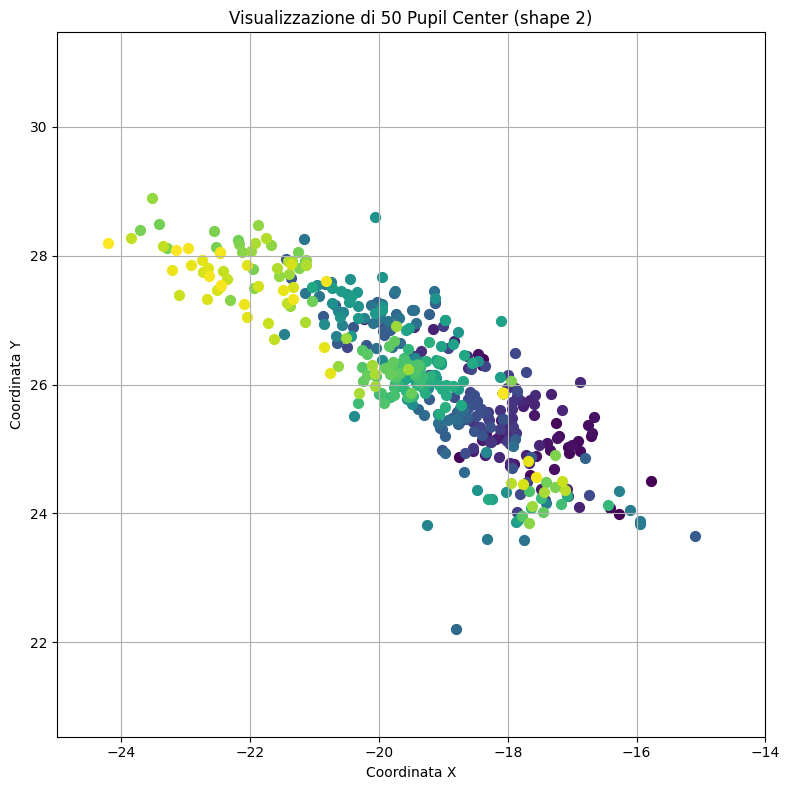

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Configurazione ---
cartella_comportamenti_allen = '/content/V1T/data/allen/501559087/data/pupil_center'

# Prendi fino a 50 file .npy dalla cartella
tutti_file = sorted([f for f in os.listdir(cartella_comportamenti_allen) if f.endswith('.npy')])
file_da_mostrare = tutti_file[:500]  # Prendi i primi 50

print(f"Visualizzo {len(file_da_mostrare)} file pupil center...")

# --- Preparo la figura ---
plt.figure(figsize=(8, 8))
plt.title("Visualizzazione di 50 Pupil Center (shape 2)")
plt.xlabel("Coordinata X")
plt.ylabel("Coordinata Y")
plt.grid(True)

# Colori con colormap per varietà (opzionale)
cmap = plt.get_cmap('viridis')
num_punti = len(file_da_mostrare)

for i, nome_file in enumerate(file_da_mostrare):
    percorso_file = os.path.join(cartella_comportamenti_allen, nome_file)
    try:
        dati = np.load(percorso_file)
        if dati.shape == (2,):
            x, y = dati
            colore = cmap(i / num_punti)
            plt.scatter(x, y, color=colore, s=50, label=nome_file)
        else:
            print(f"⚠️ File '{nome_file}' shape diversa da (2,), saltato.")
    except Exception as e:
        print(f"Errore caricando '{nome_file}': {e}")

# Per non appesantire troppo la legenda, puoi commentare questa riga:
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# ... codice precedente ...

plt.axis('equal')
plt.xlim(-25, -14)  # <-- Limita X
plt.ylim(22, 30)    # <-- Limita Y
plt.tight_layout()
plt.show()



---

##Metadati

###Neurons

In [28]:
# --- A. Fase di Configurazione ---
cartella_output_unit_ids = '/content/V1T/data/allen/501559087/meta/neurons'
nome_file_output = 'unit_ids.npy'
numero_neuroni_desiderato = 90

# Tipo di dato per gli ID
tipo_dato_ids = np.uint16

# Inizio degli ID (puoi scegliere 0 o 1, a seconda di come vuoi che inizino gli ID)
inizio_ids = 1

# --- B. Processo di elaborazione ---
print(f"Tentativo di creare il file '{nome_file_output}' nella cartella: {cartella_output_unit_ids}")

# 1. Creare la cartella di output se non esiste
if not os.path.exists(cartella_output_unit_ids):
    os.makedirs(cartella_output_unit_ids)
    print(f"\nCreata cartella di output: '{cartella_output_unit_ids}'")
else:
    print(f"\nLa cartella di output '{cartella_output_unit_ids}' esiste già.")

# 2. Generare gli ID di unità
unit_ids_nuovi = np.arange(inizio_ids, inizio_ids + numero_neuroni_desiderato, dtype=tipo_dato_ids)

print(f"  Generati {len(unit_ids_nuovi)} ID di unità con tipo di dato {unit_ids_nuovi.dtype}.")
print(f"  Primi ID generati: {unit_ids_nuovi[:10] if len(unit_ids_nuovi) > 10 else unit_ids_nuovi}")

# 3. Definire il percorso completo del file di output
percorso_file_output = os.path.join(cartella_output_unit_ids, nome_file_output)

# 4. Salvare l'array nel file .npy
try:
    np.save(percorso_file_output, unit_ids_nuovi)
    print(f"\nFile '{nome_file_output}' creato con successo in '{cartella_output_unit_ids}'.")
    print(f"  Shape dell'array salvato: {np.load(percorso_file_output).shape}")

except Exception as e:
    print(f"Errore durante il salvataggio del file '{nome_file_output}': {e}")

Tentativo di creare il file 'unit_ids.npy' nella cartella: /content/V1T/data/allen/501559087/meta/neurons

Creata cartella di output: '/content/V1T/data/allen/501559087/meta/neurons'
  Generati 90 ID di unità con tipo di dato uint16.
  Primi ID generati: [ 1  2  3  4  5  6  7  8  9 10]

File 'unit_ids.npy' creato con successo in '/content/V1T/data/allen/501559087/meta/neurons'.
  Shape dell'array salvato: (90,)


In [29]:
# Questo codice serve per verificare che il file unit_ids.npy sia stato creato correttamente.
# Stampa alcune info utili : shape, tipo ..

# --- A. Fase di Configurazione ---
percorso_file_da_verificare = '/content/V1T/data/allen/501559087/meta/neurons/unit_ids.npy'
print(f"Tentativo di caricare e verificare il file: {percorso_file_da_verificare}")

# 1. Verifica che il file esista
if os.path.exists(percorso_file_da_verificare):
    try:
        # 2. Carica il file .npy
        unit_ids_verificati = np.load(percorso_file_da_verificare)

        print(f"  File caricato con successo.")

        # 3. Visualizza le proprietà principali
        print(f"  Tipo di dato dell'array: {unit_ids_verificati.dtype}")
        print(f"  Shape dell'array: {unit_ids_verificati.shape}")
        print(f"  Numero totale di ID di unità: {len(unit_ids_verificati)}")

        # 4. Visualizza i primi e gli ultimi ID per verifica
        print("\nPrimi ID di unità:")
        if len(unit_ids_verificati) > 5: # Limita l'output se l'array è lungo
            print(unit_ids_verificati[:5])
        else:
            print(unit_ids_verificati)

        if len(unit_ids_verificati) > 5:
            print("\nUltimi ID di unità:")
            print(unit_ids_verificati[-5:])

    except FileNotFoundError:
        print(f"Errore: File non trovato al percorso '{percorso_file_da_verificare}'. Assicurati che il percorso sia corretto.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file .npy: {e}")
else:
    print(f"Il file '{percorso_file_da_verificare}' non è stato trovato. Assicurati di aver eseguito lo script di creazione.")

Tentativo di caricare e verificare il file: /content/V1T/data/allen/501559087/meta/neurons/unit_ids.npy
  File caricato con successo.
  Tipo di dato dell'array: uint16
  Shape dell'array: (90,)
  Numero totale di ID di unità: 90

Primi ID di unità:
[1 2 3 4 5]

Ultimi ID di unità:
[86 87 88 89 90]


In [30]:
# Questo codice serve per estrarre le coordinate tridimensionali (X, Y, Z) dei neuroni (ROI) da una specifica
# sessione di imaging a calcio nel cervello di un topo, utilizzando AllenSDK, e salvare queste coordinate
# in un file cell_motor_coordinates.npy per essere usate da altri strumenti (come V1T).
#
# Output finale del file 'cell_motor_coordinates.npy' :
# Contiene un array NumPy di dimensione (174, 3) (se i neuroni sono 174), con:
#
#	Colonna 0 -> X
#	Colonna 1 -> Y
#	Colonna 2 -> Z (profondità)

import inspect

# --- Ottenere l'oggetto DataSet ---
print(f"Tentativo di ottenere i dati per la sessione {session_id}...")
try:
    data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
    print(f"Dati sessione ottenuti con successo per l'ID {session_id}. Oggetto tipo: {type(data_set)}")

    # --- Ottenere la profondità di imaging (per la coordinata Z) ---
    print("\nOttenimento della profondità di imaging...")
    metadata = data_set.get_metadata()

    # Verifica che il metadato 'imaging_depth_um' sia presente
    if 'imaging_depth_um' in metadata:
        profondita_z = metadata['imaging_depth_um']
        print(f"Trovata profondità di imaging: {profondita_z} µm")
        # Converti in un tipo numerico appropriato (float o int) se non lo è già
        # Spesso è un int
        profondita_z = float(profondita_z) # Usiamo float per compatibilità con i centroidi XY float

    else:
        print("Errore: Metadato 'imaging_depth_um' non trovato nei metadati. Impossibile determinare la profondità Z.")
        # Puoi decidere cosa fare qui: terminare, usare un valore predefinito, ecc.
        # Per questo esempio, termineremo l'esecuzione se non troviamo la profondità.
        raise KeyError("Metadato 'imaging_depth_um' mancante.")

    # --- Ottenere le maschere delle ROI e calcolare i centroidi XY ---
    print("\nOttenimento delle maschere delle ROI e calcolo dei centroidi XY...")

    # 1. Otteniamo l'array delle maschere delle ROI
    roi_masks_array = data_set.get_roi_mask_array()

    print(f"Ottenute maschere delle ROI con shape: {roi_masks_array.shape}")

    # 2. Calcola i centroidi (posizioni centrali) per ogni ROI (X, Y)
    num_rois = roi_masks_array.shape[0]
    roi_centroids_xy = np.zeros((num_rois, 2), dtype=np.float32) # Shape (num_rois, 2)

    print(f"\nCalcolo dei centroidi XY per {num_rois} ROI...")

    for i in range(num_rois):
        mask = roi_masks_array[i, :, :]
        rows, cols = np.where(mask > 0)

        if len(rows) > 0:
            centroid_y = np.mean(rows) # Coordinate Y
            centroid_x = np.mean(cols) # Coordinate X
            roi_centroids_xy[i, 0] = centroid_x
            roi_centroids_xy[i, 1] = centroid_y
        else:
            print(f"Avviso: Maschera ROI {i} vuota. Impostazione centroidi XY a 0,0.")
            roi_centroids_xy[i, 0] = 0.0
            roi_centroids_xy[i, 1] = 0.0

    print(f"\nCalcolo centroidi XY completato. Array centroidi XY shape: {roi_centroids_xy.shape}")
    print("Primi 5 centroidi (X, Y):")
    print(roi_centroids_xy[:5, :])


    # --- Costruisci l'array finale delle coordinate XYZ ---
    # La colonna Z sarà la profondità di imaging ottenuta dai metadati

    num_dimensions_v1t = 3 # Il numero di colonne che v1t si aspetta (XYZ)

    if roi_centroids_xy.shape[1] == 2 and num_dimensions_v1t == 3:
        print(f"\nAggiunta colonna Z con valore di profondità ({profondita_z} µm)...")
        # Crea una colonna NumPy riempita con il valore di profondità Z
        colonna_z = np.full((num_rois, 1), profondita_z, dtype=np.float32) # Shape (num_rois, 1)

        # Concatena i centroidi XY con la colonna Z
        cell_motor_coordinates_array = np.concatenate((roi_centroids_xy, colonna_z), axis=1)
        print(f"Array coordinate finale (XY + Z={profondita_z}) shape: {cell_motor_coordinates_array.shape}")

    elif roi_centroids_xy.shape[1] == num_dimensions_v1t:
         # Se per qualche motivo i centroidi avevano già 3 dimensioni (improbabile per Ophys 2D)
         cell_motor_coordinates_array = roi_centroids_xy
         print(f"\nCentroidi XY già con {num_dimensions_v1t} dimensioni. Nessuna aggiunta Z.")

    elif roi_centroids_xy.shape[1] > num_dimensions_v1t:
         print(f"\nAvviso: I centroidi XY hanno più dimensioni ({roi_centroids_xy.shape[1]}) di quelle attese da v1t ({num_dimensions_v1t}).")
         # In questo caso, potresti dover decidere quali colonne mantenere.
         # Per ora, useremo solo le prime 3 colonne per compatibilità con v1t.
         print(f"  Truncamento alle prime {num_dimensions_v1t} colonne.")
         cell_motor_coordinates_array = roi_centroids_xy[:, :num_dimensions_v1t]
         print(f"Array coordinate finale (troncato) shape: {cell_motor_coordinates_array.shape}")

    else:
        print(f"\nErrore: Shape dei centroidi XY inattesa ({roi_centroids_xy.shape}) per la costruzione dell'array finale con {num_dimensions_v1t} dimensioni.")
        raise ValueError("Shape centroidi XY non compatibile per costruzione array finale.")

    # 4. Salva l'array in un file .npy
    cartella_output_coords = f'V1T/data/allen/501559087/meta/neurons' # <--- Adatta questo percorso!
    nome_file_output = 'cell_motor_coordinates.npy'
    percorso_file_output = os.path.join(cartella_output_coords, nome_file_output)

    # Crea la cartella se non esiste
    if not os.path.exists(cartella_output_coords):
        os.makedirs(cartella_output_coords)
        print(f"\nCreata cartella di output per le coordinate: '{cartella_output_coords}'")
    else:
         print(f"\nLa cartella di output per le coordinate '{cartella_output_coords}' esiste già.")

    try:
        np.save(percorso_file_output, cell_motor_coordinates_array)
        print(f"\nArray 'cell_motor_coordinates.npy' (con Z={profondita_z} µm) salvato con successo in '{percorso_file_output}'.")
    except Exception as e:
        print(f"Errore durante il salvataggio dell'array delle coordinate: {e}")

except Exception as e:
    print(f"Errore generale: {e}")
    print(f"Tipo di errore: {type(e).__name__}")

Tentativo di ottenere i dati per la sessione 508546728...
Dati sessione ottenuti con successo per l'ID 508546728. Oggetto tipo: <class 'allensdk.core.brain_observatory_nwb_data_set.BrainObservatoryNwbDataSet'>

Ottenimento della profondità di imaging...
Trovata profondità di imaging: 275 µm

Ottenimento delle maschere delle ROI e calcolo dei centroidi XY...
Ottenute maschere delle ROI con shape: (90, 512, 512)

Calcolo dei centroidi XY per 90 ROI...

Calcolo centroidi XY completato. Array centroidi XY shape: (90, 2)
Primi 5 centroidi (X, Y):
[[293.13513  196.96622 ]
 [340.55484  183.67741 ]
 [295.7486   112.51397 ]
 [434.63742   75.391815]
 [306.0345   325.83447 ]]

Aggiunta colonna Z con valore di profondità (275.0 µm)...
Array coordinate finale (XY + Z=275.0) shape: (90, 3)

La cartella di output per le coordinate 'V1T/data/allen/501559087/meta/neurons' esiste già.

Array 'cell_motor_coordinates.npy' (con Z=275.0 µm) salvato con successo in 'V1T/data/allen/501559087/meta/neurons/cell

In [31]:
# Lo scopo dello script è verificare che il file cell_motor_coordinates.npy, contenente le coordinate spaziali (X, Y, Z) dei neuroni,
# sia stato creato correttamente e abbia i dati nella forma attesa.

# --- A. Fase di Configurazione ---
percorso_file_da_verificare = '/content/V1T/data/allen/501559087/meta/neurons/cell_motor_coordinates.npy'

# Numero di righe (neuroni) e colonne (coordinate/metriche) da mostrare all'inizio.
num_righe_da_mostrare = 5
num_colonne_da_mostrare = 3

# --- B. Caricamento e visualizzazione per verifica ---
print(f"Tentativo di caricare e verificare il file: {percorso_file_da_verificare}")

# 1. Verifica che il file esista
if os.path.exists(percorso_file_da_verificare):
    try:
        # 2. Carica il file .npy
        coords_verificati = np.load(percorso_file_da_verificare)

        print(f"  File caricato con successo.")

        # 3. Visualizza le proprietà principali
        print(f"  Tipo di dato dell'array: {coords_verificati.dtype}")
        print(f"  Shape dell'array: {coords_verificati.shape}")
        print(f"  Numero totale di neuroni (righe): {coords_verificati.shape[0]}")
        if coords_verificati.ndim > 1:
            print(f"  Numero di coordinate/metriche per neurone (colonne): {coords_verificati.shape[1]}")
        else:
            print("  L'array è unidimensionale.")

        # 4. Visualizza i primi valori
        print(f"\nPrimi {min(num_righe_da_mostrare, coords_verificati.shape[0])} righe (neuroni) e prime {coords_verificati.shape[1] if coords_verificati.ndim > 1 else 1} colonne:")

        if coords_verificati.ndim >= 1:
             # Visualizza le prime N righe e le prime M colonne
             righe_per_mostrare = min(num_righe_da_mostrare, coords_verificati.shape[0])
             if coords_verificati.ndim > 1:
                 colonne_per_mostrare = min(num_colonne_da_mostrare, coords_verificati.shape[1])
                 print(coords_verificati[:righe_per_mostrare, :colonne_per_mostrare])
             else:
                 # Se è 1D, mostra solo le prime righe
                 print(coords_verificati[:righe_per_mostrare])

             if coords_verificati.shape[0] > num_righe_da_mostrare:
                 print("...") # Indica che ci sono più righe non mostrate

             # Visualizza anche le ultime righe per controllo (utile se l'array è lungo)
             if coords_verificati.shape[0] > num_righe_da_mostrare:
                 print(f"\nUltimi {min(num_righe_da_mostrare, coords_verificati.shape[0] - num_righe_da_mostrare)} righe (neuroni):")
                 if coords_verificati.ndim > 1:
                      print(coords_verificati[-min(num_righe_da_mostrare, coords_verificati.shape[0]):, :colonne_per_mostrare])
                 else:
                      print(coords_verificati[-min(num_righe_da_mostrare, coords_verificati.shape[0]):])

        else:
             print("  L'array è vuoto o ha una shape inattesa.")

    except FileNotFoundError:
        print(f"Errore: File non trovato al percorso '{percorso_file_da_verificare}'. Assicurati che il percorso sia corretto.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file .npy: {e}")
else:
    print(f"Il file '{percorso_file_da_verificare}' non è stato trovato. Assicurati di aver eseguito lo script di creazione.")

Tentativo di caricare e verificare il file: /content/V1T/data/allen/501559087/meta/neurons/cell_motor_coordinates.npy
  File caricato con successo.
  Tipo di dato dell'array: float32
  Shape dell'array: (90, 3)
  Numero totale di neuroni (righe): 90
  Numero di coordinate/metriche per neurone (colonne): 3

Primi 5 righe (neuroni) e prime 3 colonne:
[[293.13513  196.96622  275.      ]
 [340.55484  183.67741  275.      ]
 [295.7486   112.51397  275.      ]
 [434.63742   75.391815 275.      ]
 [306.0345   325.83447  275.      ]]
...

Ultimi 5 righe (neuroni):
[[437.30927  277.0464   275.      ]
 [435.40625   21.671875 275.      ]
 [369.48053   49.487015 275.      ]
 [344.2886    25.825504 275.      ]
 [ 74.92254  480.4859   275.      ]]


###Statistics

NB : Sono state calcolate le statistiche su tutto il Dataset Allen.
Bryan (ricercatore V1T) ci consiglia di farlo solo sul set di training.
Dovrebbe essere possibile cambiare in maniera veloce.

In [32]:
# Questo script serve a caricare tutte le risposte neuronali aggregate precedentemente salvate come file *.npy
# al fine di calcolare alcune statistiche (minimo, massimo, media, mediana, deviazione standard) per ciascun neurone
# , e salvare queste statistiche in file separati (min.npy ...).
#
# Ogni file rappresenta la risposta neuronale di tutti i neuroni a uno specifico stimolo visivo.
#
# stimolo_001.npy -> [0.15, 0.33, 0.02, ..., 0.48] # il 1° elemento è la risposta del 1° neurone ecc.
# stimolo_002.npy -> [0.12, 0.31, 0.07, ..., 0.52]
# stimolo_003.npy -> [0.20, 0.29, 0.03, ..., 0.45]
#
# Il codice impila tutti i vettori in un array 2D e poi calcola le statistiche su ogni neurone (cioè su ogni colonna di questa matrice),
# quindi salva le statistiche in files distinti nella cartella di destinazione

# --- A. Fase di Configurazione ---
cartella_risposte_aggregate = '/content/V1T/data/allen/501559087/data/responses'
cartella_output_statistiche = '/content/V1T/data/allen/501559087/meta/statistics/responses/all'

# --- B. Processo di elaborazione ---
print(f"Inizio caricamento risposte da '{cartella_risposte_aggregate}' e calcolo statistiche...")

# 1. Creare la cartella di output se non esiste
if not os.path.exists(cartella_output_statistiche):
    os.makedirs(cartella_output_statistiche)
    print(f"\nCreata cartella di output per le statistiche: '{cartella_output_statistiche}'")
else:
    print(f"\nLa cartella di output per le statistiche '{cartella_output_statistiche}' esiste già.")

# 2. Ottenere la lista dei file *.npy nella cartella delle risposte
lista_file_risposte = [f for f in os.listdir(cartella_risposte_aggregate) if f.endswith('.npy')]
lista_file_risposte.sort() # Ordina i file per un caricamento coerente (opzionale ma buona pratica)

num_file_risposte = len(lista_file_risposte)
print(f"\nTrovati {num_file_risposte} file .npy delle risposte aggregate.")

if num_file_risposte == 0:
    print("Nessun file .npy trovato nella cartella delle risposte.")
else:
    # 3. Caricare tutti i dati di risposta in un unico array NumPy
    # Inizializza una lista per tenere i dati caricati
    all_responses_list = []

    print("\nCaricamento di tutti i file di risposta...")
    for i, nome_file_risposta in enumerate(lista_file_risposte):
        percorso_file_risposta = os.path.join(cartella_risposte_aggregate, nome_file_risposta)
        try:
            response_data = np.load(percorso_file_risposta)
            # Assumiamo che ogni file .npy contenga un vettore 1D di risposte cellulari
            # di shape (numero_di_neuroni,) o simile.
            # Ci aspettiamo che tutti i file abbiano la stessa shape.
            all_responses_list.append(response_data)
        except FileNotFoundError:
            print(f"  Avviso: File non trovato: '{percorso_file_risposta}'. Salto.")
        except Exception as e:
            print(f"  Errore durante il caricamento di '{nome_file_risposta}': {e}. Salto.")

    if not all_responses_list:
        print("Nessun dato di risposta valido caricato. Impossibile calcolare le statistiche.")
    else:
        # Concatena tutti i vettori di risposta in un unico array 2D
        # La shape risultante sarà (numero_di_stimoli, numero_di_neuroni)
        all_responses_array = np.stack(all_responses_list, axis=0)
        print(f"\nDati di risposta aggregati in un array di shape: {all_responses_array.shape}")

        # 4. Calcolare le statistiche richieste sull'array aggregato
        # Calcola le statistiche lungo l'asse degli stimoli (axis=0)
        # Questo darà un valore per ogni neurone per ogni statistica
        print("\nCalcolo delle statistiche (min, max, mean, median, std)...")
        min_responses = np.min(all_responses_array, axis=0)
        max_responses = np.max(all_responses_array, axis=0)
        mean_responses = np.mean(all_responses_array, axis=0)
        median_responses = np.median(all_responses_array, axis=0)
        std_responses = np.std(all_responses_array, axis=0)

        print(f"  Shape delle statistiche calcolate (dovrebbe essere numero_di_neuroni):")
        print(f"    Min: {min_responses.shape}")
        print(f"    Max: {max_responses.shape}")
        print(f"    Mean: {mean_responses.shape}")
        print(f"    Median: {median_responses.shape}")
        print(f"    Std: {std_responses.shape}")

        # 5. Salvare ogni statistica in un file .npy separato nella cartella di output
        print(f"\nSalvataggio dei file statistici nella cartella: '{cartella_output_statistiche}'")

        statistiche_da_salvare = {
            'min.npy': min_responses,
            'max.npy': max_responses,
            'mean.npy': mean_responses,
            'median.npy': median_responses,
            'std.npy': std_responses
        }

        for nome_file, dati_statistica in statistiche_da_salvare.items():
            percorso_salvataggio = os.path.join(cartella_output_statistiche, nome_file)
            try:
                np.save(percorso_salvataggio, dati_statistica)
                print(f"  Salvato '{nome_file}' con shape {dati_statistica.shape}.")
            except Exception as e:
                print(f"  Errore durante il salvataggio di '{nome_file}': {e}")

# --- Risultati ---
print("\nProcesso di calcolo e salvataggio delle statistiche completato.")
print(f"Controlla la cartella '{cartella_output_statistiche}' nel pannello File per i file statistici.")

Inizio caricamento risposte da '/content/V1T/data/allen/501559087/data/responses' e calcolo statistiche...

Creata cartella di output per le statistiche: '/content/V1T/data/allen/501559087/meta/statistics/responses/all'

Trovati 5950 file .npy delle risposte aggregate.

Caricamento di tutti i file di risposta...

Dati di risposta aggregati in un array di shape: (5950, 90)

Calcolo delle statistiche (min, max, mean, median, std)...
  Shape delle statistiche calcolate (dovrebbe essere numero_di_neuroni):
    Min: (90,)
    Max: (90,)
    Mean: (90,)
    Median: (90,)
    Std: (90,)

Salvataggio dei file statistici nella cartella: '/content/V1T/data/allen/501559087/meta/statistics/responses/all'
  Salvato 'min.npy' con shape (90,).
  Salvato 'max.npy' con shape (90,).
  Salvato 'mean.npy' con shape (90,).
  Salvato 'median.npy' con shape (90,).
  Salvato 'std.npy' con shape (90,).

Processo di calcolo e salvataggio delle statistiche completato.
Controlla la cartella '/content/V1T/data/all

In [33]:
# Questo script serve per caricare e visualizzare i file *.npy contenenti statistiche calcolate
# sulle risposte neuronali (media, deviazione standard, ecc.) che sono stati salvati prima.
# Stampa : shape, tipo ...

# --- A. Fase di Configurazione ---
cartella_statistiche_risposte = '/content/V1T/data/allen/501559087/meta/statistics/responses/all'
nomi_file_statistiche = ['min.npy', 'max.npy', 'mean.npy', 'median.npy', 'std.npy']

# --- Caricamento e visualizzazione ---
print(f"Inizio caricamento e visualizzazione dei file statistici da '{cartella_statistiche_risposte}'...")

# 1. Verificare che la cartella esista
if not os.path.isdir(cartella_statistiche_risposte):
    print(f"Errore: La cartella '{cartella_statistiche_risposte}' non esiste.")
else:
    # 2. Scorrere l'elenco dei file statistici
    for nome_file in nomi_file_statistiche:
        percorso_file = os.path.join(cartella_statistiche_risposte, nome_file)

        print(f"\nCaricamento file: '{nome_file}'")
        print(f"  Percorso completo: {percorso_file}")

        # 3. Verificare se il file esiste
        if os.path.exists(percorso_file):
            try:
                # 4. Caricare il file .npy
                statistiche_data = np.load(percorso_file)

                # 5. Visualizzare le informazioni e i primi valori
                print(f"  Shape dei dati caricati: {statistiche_data.shape}")
                print(f"  Tipo di dati (dtype): {statistiche_data.dtype}")

                # Queste statistiche dovrebbero essere vettori 1D, uno per ogni neurone.
                # Stampiamo i primi valori per verificarne il contenuto.
                if statistiche_data.size > 0:
                     # Stampa i primi 10 valori o tutti se sono meno di 10
                    num_valori_da_mostrare = min(10, statistiche_data.size)
                    print(f"  Primi {num_valori_da_mostrare} valori:")
                    print(statistiche_data[:num_valori_da_mostrare])
                else:
                    print("  Il file caricato è vuoto.")


            except FileNotFoundError:
                print(f"  Errore: File .npy non trovato al percorso '{percorso_file}'.")
            except Exception as e:
                print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file}: {e}")
        else:
            print(f"  Il file .npy '{nome_file}' non trovato nella cartella '{cartella_statistiche_risposte}'.")

print("\nProcesso di visualizzazione dei file statistici completato.")

Inizio caricamento e visualizzazione dei file statistici da '/content/V1T/data/allen/501559087/meta/statistics/responses/all'...

Caricamento file: 'min.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/responses/all/min.npy
  Shape dei dati caricati: (90,)
  Tipo di dati (dtype): float32
  Primi 10 valori:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Caricamento file: 'max.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/responses/all/max.npy
  Shape dei dati caricati: (90,)
  Tipo di dati (dtype): float32
  Primi 10 valori:
[0.09283035 0.11735078 0.12865227 0.07298631 0.07095448 0.13954757
 0.25794578 0.16493967 0.1857449  0.01943352]

Caricamento file: 'mean.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/responses/all/mean.npy
  Shape dei dati caricati: (90,)
  Tipo di dati (dtype): float32
  Primi 10 valori:
[0.00040359 0.00048782 0.00030266 0.00039619 0.00067233 0.00047608
 0.00185343 0.00086509 0.00092632 0.000

In [34]:
# Questo codice serve a caricare immagini già preprocessate (salvate come file .npy)
# , calcolare statistiche globali sui pixel (media, deviazione standard, ecc.)
# e salvare queste statistiche come VALORI SCALARI (come in Sensorium) in file *.npy.

# --- A. Fase di Configurazione ---
cartella_immagini_elaborate = '/content/V1T/data/allen/501559087/data/images'
cartella_output_statistiche_immagini_globali = '/content/V1T/data/allen/501559087/meta/statistics/images/all'

# --- B. Processo di elaborazione ---
print(f"Inizio caricamento immagini da '{cartella_immagini_elaborate}' e calcolo statistiche globali...")

# 1. Creare la cartella di output per le statistiche se non esiste
if not os.path.exists(cartella_output_statistiche_immagini_globali):
    os.makedirs(cartella_output_statistiche_immagini_globali)
    print(f"\nCreata cartella di output per le statistiche globali delle immagini: '{cartella_output_statistiche_immagini_globali}'")
else:
    print(f"\nLa cartella di output per le statistiche globali delle immagini '{cartella_output_statistiche_immagini_globali}' esiste già.")

# 2. Ottenere la lista dei file .npy nella cartella delle immagini
lista_file_immagini = [f for f in os.listdir(cartella_immagini_elaborate) if f.endswith('.npy')]
lista_file_immagini.sort() # Ordina i file

num_file_immagini = len(lista_file_immagini)
print(f"\nTrovati {num_file_immagini} file .npy delle immagini elaborate.")

if num_file_immagini == 0:
    print("Nessun file .npy trovato nella cartella delle immagini elaborate.")
else:
    # 3. Caricare tutti i dati delle immagini in un unico array NumPy
    all_images_list = []

    print("\nCaricamento di tutti i file immagine...")
    for i, nome_file_immagine in enumerate(lista_file_immagini):
        percorso_file_immagine = os.path.join(cartella_immagini_elaborate, nome_file_immagine)
        try:
            img_data = np.load(percorso_file_immagine)
            # Ci aspettiamo shape (1, altezza_target, larghezza_target)
            all_images_list.append(img_data)
            # print(f"  Caricato file {i+1}/{num_file_immagini}: '{nome_file_immagine}'") # Opzionale
        except FileNotFoundError:
            print(f"  Avviso: File non trovato: '{percorso_file_immagine}'. Salto.")
        except Exception as e:
            print(f"  Errore durante il caricamento di '{nome_file_immagine}': {e}. Salto.")

    if not all_images_list:
        print("Nessun dato immagine valido caricato. Impossibile calcolare le statistiche.")
    else:
        # Concatena tutti gli array immagine in un unico array
        # Shape: (numero_di_immagini, 1, altezza_target, larghezza_target)
        all_images_array = np.concatenate(all_images_list, axis=0)
        print(f"\nDati immagine aggregati in un array di shape: {all_images_array.shape}")

        # Flatteniamo l'array per avere tutti i pixel in un unico lungo vettore
        # Questo rende il calcolo delle statistiche globali più semplice
        all_pixels = all_images_array.flatten()
        print(f"Array di tutti i pixel appiattito con size: {all_pixels.size}")

        # 4. Calcolare le statistiche globali sull'array di tutti i pixel
        # Il calcolo avviene sull'intero array all_pixels
        print("\nCalcolo delle statistiche globali su tutti i pixel (min, max, mean, median, std)...")

        try:
            min_global_image = np.min(all_pixels)
            max_global_image = np.max(all_pixels)
            mean_global_image = np.mean(all_pixels)
            median_global_image = np.median(all_pixels)
            std_global_image = np.std(all_pixels)

            print(f"  Min globale: {min_global_image}")
            print(f"  Max globale: {max_global_image}")
            print(f"  Mean globale: {mean_global_image}")
            print(f"  Median globale: {median_global_image}")
            print(f"  Std globale: {std_global_image}")

            # 5. Salvare ogni statistica scalare in un file .npy separato
            print(f"\nSalvataggio dei file statistici globali delle immagini nella cartella: '{cartella_output_statistiche_immagini_globali}'")

            statistiche_immagini_globali_da_salvare = {
                'min.npy': np.array(min_global_image),
                'max.npy': np.array(max_global_image),
                'mean.npy': np.array(mean_global_image),
                'median.npy': np.array(median_global_image),
                'std.npy': np.array(std_global_image)
            }

            for nome_file, dati_statistica in statistiche_immagini_globali_da_salvare.items():
                percorso_salvataggio = os.path.join(cartella_output_statistiche_immagini_globali, nome_file)
                try:
                    np.save(percorso_salvataggio, dati_statistica)
                    print(f"  Salvato '{nome_file}'.")
                except Exception as e:
                    print(f"  Errore durante il salvataggio di '{nome_file}': {e}")

        except Exception as e:
            print(f"Errore durante il calcolo delle statistiche globali: {e}")

# --- C. Risultati finali ---
print("\nProcesso di calcolo e salvataggio delle statistiche globali delle immagini completato.")
print(f"Controlla la cartella '{cartella_output_statistiche_immagini_globali}' nel pannello File per i file statistici scalari.")

Inizio caricamento immagini da '/content/V1T/data/allen/501559087/data/images' e calcolo statistiche globali...

Creata cartella di output per le statistiche globali delle immagini: '/content/V1T/data/allen/501559087/meta/statistics/images/all'

Trovati 5950 file .npy delle immagini elaborate.

Caricamento di tutti i file immagine...

Dati immagine aggregati in un array di shape: (5950, 144, 256)
Array di tutti i pixel appiattito con size: 219340800

Calcolo delle statistiche globali su tutti i pixel (min, max, mean, median, std)...
  Min globale: 0
  Max globale: 255
  Mean globale: 124.33156827183998
  Median globale: 116.0
  Std globale: 64.60241963239915

Salvataggio dei file statistici globali delle immagini nella cartella: '/content/V1T/data/allen/501559087/meta/statistics/images/all'
  Salvato 'min.npy'.
  Salvato 'max.npy'.
  Salvato 'mean.npy'.
  Salvato 'median.npy'.
  Salvato 'std.npy'.

Processo di calcolo e salvataggio delle statistiche globali delle immagini completato.
C

In [35]:
import os
import numpy as np

# --- A. Fase di Configurazione ---
cartella_dati_behavior = '/content/V1T/data/allen/501559087/data/behavior'
cartella_output_statistiche_behavior = '/content/V1T/data/allen/501559087/meta/statistics/behavior/all'
numero_elementi_iniziali = 3  # Vogliamo sempre 3 elementi per vettore

# --- B. Creazione cartella output ---
os.makedirs(cartella_output_statistiche_behavior, exist_ok=True)
print(f"\n📁 Cartella statistica: '{cartella_output_statistiche_behavior}'")

# --- C. Raccolta dati iniziali ---
lista_file_behavior = sorted([f for f in os.listdir(cartella_dati_behavior) if f.endswith('.npy')])
initial_elements_list = []

print(f"\n🔍 Trovati {len(lista_file_behavior)} file .npy. Elaborazione in corso...\n")

file_con_nan = []

for nome_file in lista_file_behavior:
    percorso_file = os.path.join(cartella_dati_behavior, nome_file)
    try:
        data = np.load(percorso_file).flatten()
        if len(data) >= 3:
            vettore = data[:3]
        elif len(data) == 2:
            vettore = np.append(data, 0.0)
        else:
            print(f"  ⚠️  '{nome_file}' ha meno di 2 elementi. Saltato.")
            continue

        # Verifica NaN
        if np.isnan(vettore).any():
            file_con_nan.append(nome_file)
            continue  # salta vettori con NaN

        initial_elements_list.append(vettore)

    except Exception as e:
        print(f"  ❌ Errore con '{nome_file}': {e}")

if not initial_elements_list:
    print("\n❌ Nessun dato valido trovato.")
else:
    all_behavior_data = np.stack(initial_elements_list)
    print(f"\n📊 Dati raccolti. Shape finale: {all_behavior_data.shape}")

    # --- D. Calcolo statistiche (ignora eventuali NaN, ma non dovrebbero essercene)
    try:
        min_behavior = np.nanmin(all_behavior_data, axis=0)
        max_behavior = np.nanmax(all_behavior_data, axis=0)
        mean_behavior = np.nanmean(all_behavior_data, axis=0)
        median_behavior = np.nanmedian(all_behavior_data, axis=0)
        std_behavior = np.nanstd(all_behavior_data, axis=0)

        statistiche_behavior_da_salvare = {
            'min.npy': min_behavior,
            'max.npy': max_behavior,
            'mean.npy': mean_behavior,
            'median.npy': median_behavior,
            'std.npy': std_behavior
        }

        # --- E. Salvataggio ---
        for nome_file_stat, statistica in statistiche_behavior_da_salvare.items():
            percorso_salvataggio = os.path.join(cartella_output_statistiche_behavior, nome_file_stat)
            np.save(percorso_salvataggio, statistica)

        print(f"\n✅ Statistiche salvate in: '{cartella_output_statistiche_behavior}'")

        if file_con_nan:
            print(f"\n⚠️ File ignorati per presenza di NaN ({len(file_con_nan)}):")
            for f in file_con_nan[:5]:
                print(f"   - {f}")
            if len(file_con_nan) > 5:
                print("   ...")

    except Exception as e:
        print(f"\n❌ Errore durante il calcolo delle statistiche: {e}")



📁 Cartella statistica: '/content/V1T/data/allen/501559087/meta/statistics/behavior/all'

🔍 Trovati 5950 file .npy. Elaborazione in corso...


📊 Dati raccolti. Shape finale: (5950, 3)

✅ Statistiche salvate in: '/content/V1T/data/allen/501559087/meta/statistics/behavior/all'


In [36]:
# Questo script serve a caricare e visualizzare i file di statistiche di comportamento salvati nel codice precedente.
# Stampa : shape, tipo ...

# --- A. Fase di Configurazione ---
cartella_statistiche_behavior = '/content/V1T/data/allen/501559087/meta/statistics/behavior/all'
nomi_file_statistiche_behavior = ['min.npy', 'max.npy', 'mean.npy', 'median.npy', 'std.npy']

# --- B. Caricamento e visualizzazione ---
print(f"Inizio caricamento e visualizzazione dei file statistici di comportamento da '{cartella_statistiche_behavior}'...")

# 1. Verificare che la cartella esista
if not os.path.isdir(cartella_statistiche_behavior):
    print(f"Errore: La cartella '{cartella_statistiche_behavior}' non esiste.")
else:
    # 2. Scorrere l'elenco dei file statistici di comportamento
    for nome_file in nomi_file_statistiche_behavior:
        percorso_file = os.path.join(cartella_statistiche_behavior, nome_file)

        print(f"\nCaricamento file statistico: '{nome_file}'")
        print(f"  Percorso completo: {percorso_file}")

        # 3. Verificare se il file esiste
        if os.path.exists(percorso_file):
            try:
                # 4. Caricare il file .npy
                statistiche_data = np.load(percorso_file)

                # 5. Visualizzare la shape e i valori
                print(f"  Shape dei dati caricati: {statistiche_data.shape}") # Ci aspettiamo (3,)
                print(f"  Tipo di dati (dtype): {statistiche_data.dtype}")

                # Queste statistiche dovrebbero essere array 1D di lunghezza 3.
                # Stampiamo tutti i valori.
                if statistiche_data.size > 0:
                    print(f"  Valori: {statistiche_data}")
                else:
                    print("  Il file caricato è un array vuoto.")

            except FileNotFoundError:
                print(f"  Errore: File .npy non trovato al percorso '{percorso_file}'.")
            except Exception as e:
                print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file}: {e}")
        else:
            print(f"  Il file .npy '{nome_file}' non trovato nella cartella '{cartella_statistiche_behavior}'.")


# --- C. Risultati finali ---
print("\nProcesso di visualizzazione dei file statistici di comportamento completato.")

Inizio caricamento e visualizzazione dei file statistici di comportamento da '/content/V1T/data/allen/501559087/meta/statistics/behavior/all'...

Caricamento file statistico: 'min.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/behavior/all/min.npy
  Shape dei dati caricati: (3,)
  Tipo di dati (dtype): float32
  Valori: [411.98157  -13.482947   0.      ]

Caricamento file statistico: 'max.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/behavior/all/max.npy
  Shape dei dati caricati: (3,)
  Tipo di dati (dtype): float32
  Valori: [2.5652697e+04 1.1619029e+01 0.0000000e+00]

Caricamento file statistico: 'mean.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/behavior/all/mean.npy
  Shape dei dati caricati: (3,)
  Tipo di dati (dtype): float32
  Valori: [2.1353303e+03 1.3335583e-02 0.0000000e+00]

Caricamento file statistico: 'median.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistic

pupil center


In [37]:
import os
import numpy as np

# --- A. Fase di Configurazione ---
cartella_dati_behavior = '/content/V1T/data/allen/501559087/data/pupil_center'
cartella_output_statistiche_behavior = '/content/V1T/data/allen/501559087/meta/statistics/pupil_center/all'
numero_elementi_iniziali = 2  # pupil_center ha dimensione 2

# --- B. Creazione cartella output ---
os.makedirs(cartella_output_statistiche_behavior, exist_ok=True)
print(f"\n📁 Cartella statistica: '{cartella_output_statistiche_behavior}'")

# --- C. Raccolta dati iniziali ---
lista_file_behavior = sorted([f for f in os.listdir(cartella_dati_behavior) if f.endswith('.npy')])
initial_elements_list = []

print(f"\n🔍 Trovati {len(lista_file_behavior)} file .npy. Elaborazione in corso...\n")

file_con_nan = []

for nome_file in lista_file_behavior:
    percorso_file = os.path.join(cartella_dati_behavior, nome_file)
    try:
        # Carica il file .npy
        data = np.load(percorso_file, allow_pickle=True)

        # Qui si assume che "pupil_center" sia un array di 2 elementi
        # Se i dati sono un dizionario o una struttura, estrai pupil_center
        # Esempio se è un dict:
        if isinstance(data, np.ndarray) and data.dtype == np.object_:
            # Se è un array di oggetti, proviamo a prendere pupil_center come chiave
            # altrimenti consideriamo il dato come già pupil_center
            if isinstance(data.item(), dict) and "pupil_center" in data.item():
                pupil_center = np.array(data.item()["pupil_center"])
            else:
                pupil_center = np.array(data)
        elif isinstance(data, dict):
            pupil_center = np.array(data["pupil_center"])
        else:
            # Se il file è direttamente un array di dimensione 2
            pupil_center = np.array(data)

        # Controlla dimensione pupil_center
        if pupil_center.shape != (2,):
            print(f"  ⚠️  '{nome_file}' pupil_center non ha shape (2,), ma {pupil_center.shape}. Saltato.")
            continue

        # Verifica NaN
        if np.isnan(pupil_center).any():
            file_con_nan.append(nome_file)
            continue  # salta vettori con NaN

        initial_elements_list.append(pupil_center)

    except Exception as e:
        print(f"  ❌ Errore con '{nome_file}': {e}")

if not initial_elements_list:
    print("\n❌ Nessun dato valido trovato.")
else:
    all_pupil_center_data = np.stack(initial_elements_list)
    print(f"\n📊 Dati pupil_center raccolti. Shape finale: {all_pupil_center_data.shape}")

    # --- D. Calcolo statistiche (ignora eventuali NaN, ma non dovrebbero essercene)
    try:
        min_pupil = np.nanmin(all_pupil_center_data, axis=0)
        max_pupil = np.nanmax(all_pupil_center_data, axis=0)
        mean_pupil = np.nanmean(all_pupil_center_data, axis=0)
        median_pupil = np.nanmedian(all_pupil_center_data, axis=0)
        std_pupil = np.nanstd(all_pupil_center_data, axis=0)

        statistiche_pupil_da_salvare = {
            'min.npy': min_pupil,
            'max.npy': max_pupil,
            'mean.npy': mean_pupil,
            'median.npy': median_pupil,
            'std.npy': std_pupil
        }

        # --- E. Salvataggio ---
        for nome_file_stat, statistica in statistiche_pupil_da_salvare.items():
            percorso_salvataggio = os.path.join(cartella_output_statistiche_behavior, nome_file_stat)
            np.save(percorso_salvataggio, statistica)

        print(f"\n✅ Statistiche pupil_center salvate in: '{cartella_output_statistiche_behavior}'")

        if file_con_nan:
            print(f"\n⚠️ File ignorati per presenza di NaN ({len(file_con_nan)}):")
            for f in file_con_nan[:5]:
                print(f"   - {f}")
            if len(file_con_nan) > 5:
                print("   ...")

    except Exception as e:
        print(f"\n❌ Errore durante il calcolo delle statistiche: {e}")



📁 Cartella statistica: '/content/V1T/data/allen/501559087/meta/statistics/pupil_center/all'

🔍 Trovati 5950 file .npy. Elaborazione in corso...


📊 Dati pupil_center raccolti. Shape finale: (5950, 2)

✅ Statistiche pupil_center salvate in: '/content/V1T/data/allen/501559087/meta/statistics/pupil_center/all'


In [38]:
# Questo script serve a caricare e visualizzare i file di statistiche di comportamento salvati nel codice precedente.
# Stampa : shape, tipo ...

# --- A. Fase di Configurazione ---
cartella_statistiche_behavior = '/content/V1T/data/allen/501559087/meta/statistics/pupil_center/all'
nomi_file_statistiche_behavior = ['min.npy', 'max.npy', 'mean.npy', 'median.npy', 'std.npy']

# --- B. Caricamento e visualizzazione ---
print(f"Inizio caricamento e visualizzazione dei file statistici di comportamento da '{cartella_statistiche_behavior}'...")

# 1. Verificare che la cartella esista
if not os.path.isdir(cartella_statistiche_behavior):
    print(f"Errore: La cartella '{cartella_statistiche_behavior}' non esiste.")
else:
    # 2. Scorrere l'elenco dei file statistici di comportamento
    for nome_file in nomi_file_statistiche_behavior:
        percorso_file = os.path.join(cartella_statistiche_behavior, nome_file)

        print(f"\nCaricamento file statistico: '{nome_file}'")
        print(f"  Percorso completo: {percorso_file}")

        # 3. Verificare se il file esiste
        if os.path.exists(percorso_file):
            try:
                # 4. Caricare il file .npy
                statistiche_data = np.load(percorso_file)

                # 5. Visualizzare la shape e i valori
                print(f"  Shape dei dati caricati: {statistiche_data.shape}") # Ci aspettiamo (3,)
                print(f"  Tipo di dati (dtype): {statistiche_data.dtype}")

                # Queste statistiche dovrebbero essere array 1D di lunghezza 3.
                # Stampiamo tutti i valori.
                if statistiche_data.size > 0:
                    print(f"  Valori: {statistiche_data}")
                else:
                    print("  Il file caricato è un array vuoto.")

            except FileNotFoundError:
                print(f"  Errore: File .npy non trovato al percorso '{percorso_file}'.")
            except Exception as e:
                print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file}: {e}")
        else:
            print(f"  Il file .npy '{nome_file}' non trovato nella cartella '{cartella_statistiche_behavior}'.")


# --- C. Risultati finali ---
print("\nProcesso di visualizzazione dei file statistici di comportamento completato.")

Inizio caricamento e visualizzazione dei file statistici di comportamento da '/content/V1T/data/allen/501559087/meta/statistics/pupil_center/all'...

Caricamento file statistico: 'min.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/pupil_center/all/min.npy
  Shape dei dati caricati: (2,)
  Tipo di dati (dtype): float32
  Valori: [-50.05909   19.144028]

Caricamento file statistico: 'max.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/pupil_center/all/max.npy
  Shape dei dati caricati: (2,)
  Tipo di dati (dtype): float32
  Valori: [-5.7913203 53.437836 ]

Caricamento file statistico: 'mean.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/pupil_center/all/mean.npy
  Shape dei dati caricati: (2,)
  Tipo di dati (dtype): float32
  Valori: [-18.071285  25.874638]

Caricamento file statistico: 'median.npy'
  Percorso completo: /content/V1T/data/allen/501559087/meta/statistics/pupil_center/all/median.npy
  Sha

###Trials

In [39]:
# Obiettivo dello script è creare un array con i numeri da 0 a 49 (cioè 50 elementi)
# , salvarlo in un file chiamato trial_idx.npy e poi verificarne il contenuto.
#
# Il file trial_idx.npy serve tipicamente per rappresentare gli indici delle trial (prove, tentativi, ripetizioni) in un esperimento.
#
# A cosa serve concretamente?
# Immagina di avere un esperimento in cui presenti 50 stimoli visivi a un topo. Per ogni stimolo:
#
#	Registri l'attività neurale,
#	Registri il diametro pupillare,
#	Salvi altri segnali comportamentali.
#	Ogni stimolo viene chiamato "trial". Per gestire bene i dati, associ ogni trial a un indice.

# --- A. Fase di Configurazione ---
cartella_salvataggio = '/content/V1T/data/allen/501559087/meta/trials'
nome_file = 'trial_idx.npy'

# --- B. Processo di elaborazione ---
print(f"Inizio generazione e salvataggio dell'array NumPy in '{nome_file}'...")

# 1. Genera l'array NumPy desiderato
array_dati = np.arange(50)
print(f"  Generato array con shape: {array_dati.shape}")
print(f"  Primi 5 elementi dell'array: {array_dati[:5]}")

# 2. Creare la cartella di salvataggio se non esiste
if not os.path.exists(cartella_salvataggio):
    os.makedirs(cartella_salvataggio)
    print(f"\nCreata cartella di salvataggio: '{cartella_salvataggio}'")
else:
    print(f"\nLa cartella di salvataggio '{cartella_salvataggio}' esiste già.")

# 3. Definisci il percorso completo del file
percorso_completo_file = os.path.join(cartella_salvataggio, nome_file)

# 4. Salva l'array NumPy nel file specificato
try:
    np.save(percorso_completo_file, array_dati)
    print(f"\nArray salvato con successo in '{percorso_completo_file}'")

except Exception as e:
    print(f"\nErrore durante il salvataggio del file: {e}")

# --- Verifica (Opzionale) ---
# Puoi caricare il file per verificarne il contenuto
print("\nVerifica caricamento del file...")
if os.path.exists(percorso_completo_file):
    try:
        dati_caricati = np.load(percorso_completo_file)
        print(f"  File caricato con successo.")
        print(f"  Shape dei dati caricati: {dati_caricati.shape}")
        print(f"  Primi 5 elementi dei dati caricati: {dati_caricati[:5]}")
        if np.array_equal(array_dati, dati_caricati):
            print("  I dati caricati corrispondono ai dati originali.")
        else:
            print("  Attenzione: I dati caricati NON corrispondono ai dati originali.")

    except Exception as e:
        print(f"  Errore durante il caricamento del file di verifica: {e}")
else:
    print(f"  File '{percorso_completo_file}' non trovato per la verifica.")

Inizio generazione e salvataggio dell'array NumPy in 'trial_idx.npy'...
  Generato array con shape: (50,)
  Primi 5 elementi dell'array: [0 1 2 3 4]

Creata cartella di salvataggio: '/content/V1T/data/allen/501559087/meta/trials'

Array salvato con successo in '/content/V1T/data/allen/501559087/meta/trials/trial_idx.npy'

Verifica caricamento del file...
  File caricato con successo.
  Shape dei dati caricati: (50,)
  Primi 5 elementi dei dati caricati: [0 1 2 3 4]
  I dati caricati corrispondono ai dati originali.


---

In [48]:
import os
import numpy as np
import pandas as pd

# --- CONFIGURAZIONE ---
save_path = '/content/V1T/data/allen/501559087/meta/trials'
os.makedirs(save_path, exist_ok=True)

# Nome della colonna che identifica l'immagine
colonna_identificativa = 'frame'  # <-- Cambialo se ha un altro nome

# --- Verifica che la stim_table sia corretta ---
if not isinstance(stim_table, pd.DataFrame):
    raise ValueError("stim_table non è un DataFrame.")
if colonna_identificativa not in stim_table.columns:
    raise ValueError(f"La colonna '{colonna_identificativa}' non è presente nella stim_table.")

# --- Raggruppa i trial per immagine ---
gruppi = stim_table.groupby(colonna_identificativa).indices  # dict: {image_id: [indice_trial1, indice_trial2, ...]}

# --- Shuffle delle immagini ---
image_ids = list(gruppi.keys())
np.random.seed(42)  # per risultati riproducibili
np.random.shuffle(image_ids)

# --- Divisione in 70% train, 15% test, 15% validation ---
n_img = len(image_ids)
n_train = int(n_img * 0.7)
n_test = int(n_img * 0.15)
n_val = n_img - n_train - n_test  # Il resto

# --- Assegna ciascuna immagine a un gruppo ---
assegnazione = {}
for img in image_ids[:n_train]:
    assegnazione[img] = 'train'
for img in image_ids[n_train:n_train + n_test]:
    assegnazione[img] = 'test'
for img in image_ids[n_train + n_test:]:
    assegnazione[img] = 'validation'

# --- Crea la lista dei tiers per ogni trial ---
tiers_list = [''] * len(stim_table)
for img_id, indices in gruppi.items():
    tier = assegnazione[img_id]
    for idx in indices:
        tiers_list[idx] = tier

# --- Salva tiers.npy ---
tiers_array = np.array(tiers_list, dtype='<U10')
np.save(os.path.join(save_path, 'tiers.npy'), tiers_array)
print("✅ Salvato tiers.npy con shape:", tiers_array.shape)

# --- Salva trial_idx.npy ---
trial_ids = np.arange(len(stim_table)).astype(np.int32)
np.save(os.path.join(save_path, 'trial_idx.npy'), trial_ids)
print("✅ Salvato trial_idx.npy con shape:", trial_ids.shape)


✅ Salvato tiers.npy con shape: (5950,)
✅ Salvato trial_idx.npy con shape: (5950,)


Creazione tiers.py

---

#Sensorium
---

##Dati

Caricare le i primi 10 file delle cartelle images, behavior e responses. E innestarli dentro una cartella "data"

In [ ]:
# Carica i files delle risposte neuronali (0.npy, 1.npy, ..., 9.npy) dalla cartella 'data/responses'
# e li mette insieme in un array 2D, poi calcola media e varianza delle risposte neuronali per ogni neurone su 10 stimoli
# e li visualizza a schermo.
import numpy as np
import os

# Specifica il percorso della tua cartella
cartella_responses = 'data/responses'

# Lista per memorizzare i dati caricati da ogni file
all_data = []

# Assicurati che la cartella esista
if not os.path.isdir(cartella_responses):
    print(f"La cartella '{cartella_responses}' non esiste. Assicurati di averla caricata o creata.")
else:
    # Scorri i file da 0.npy a 9.npy
    for i in range(10):
        nome_file = f'{i}.npy'
        percorso_file = os.path.join(cartella_responses, nome_file)

        # Verifica se il file esiste
        if os.path.exists(percorso_file):
            try:
                # Carica il file .npy e aggiungilo alla lista
                data = np.load(percorso_file)
                all_data.append(data)
                print(f"Caricato file: {nome_file} con shape: {data.shape}") # Conferma caricamento
            except Exception as e:
                print(f"Errore durante il caricamento del file {nome_file}: {e}")
        else:
            print(f"Il file '{nome_file}' non trovato nella cartella '{cartella_responses}'.")

# Controlla se sono stati caricati dati
if all_data:
    # Converti la lista di array in un unico array 2D
    # Ogni riga corrisponde a un file, ogni colonna a un indice temporale/feature
    try:
        stacked_data = np.vstack(all_data) # O np.stack(all_data) se vuoi una nuova dimensione

        # Calcola la media e la varianza per ogni "colonna" (lungo l'asse 0, che rappresenta i diversi file)
        mean_across_files = np.mean(stacked_data, axis=0)
        var_across_files = np.var(stacked_data, axis=0)

        print("\n--- Risultati aggregati sui file ---")
        print(f"Shape dei dati combinati: {stacked_data.shape}")
        print(f"Shape della media tra file per ogni indice: {mean_across_files.shape}")
        print(f"Shape della varianza tra file per ogni indice: {var_across_files.shape}")

        # Puoi stampare i primi elementi per verifica
        print("\nPrime 10 medie per indice (attraverso i file):")
        print(mean_across_files[:10])
        print("\nPrime 10 varianze per indice (attraverso i file):")
        print(var_across_files[:10])

        # Puoi accedere alla media/varianza di un indice specifico, ad esempio l'indice 500:
        # print(f"\nMedia all'indice 500 (attraverso i file): {mean_across_files[500]}")
        # print(f"Varianza all'indice 500 (attraverso i file): {var_across_files[500]}")


    except ValueError as e:
        print(f"\nErrore nel combinare i dati. Assicurati che tutti i file abbiano la stessa shape.")
        print(f"Dettagli errore: {e}")

else:
    print("\nNessun file .npy valido è stato caricato.")

In [ ]:
# Obiettivo del codice è visualizzare alcune informazioni di base e i primi valori di un singolo file campione *.npy con risposte neuronali.
import numpy as np
import os


# --- A. Fase di Configurazione ---

# Specifica il percorso della tua cartella
cartella_responses = 'data/responses'
# Specifica il nome del file .npy che vuoi visualizzare (es.: '0.npy')
nome_file_da_visualizzare = '0.npy'
# Numero di valori iniziali da mostrare
num_valori_iniziali = 15


# --- B. Caricamento e visualizzazione ---
percorso_file = os.path.join(cartella_responses, nome_file_da_visualizzare)

# Verifica se il file esiste
if os.path.exists(percorso_file):
    try:
        # Carica il file .npy
        data = np.load(percorso_file)

        print(f"Informazioni sul file: {nome_file_da_visualizzare}")
        print(f"  Percorso completo: {percorso_file}")
        print(f"  Shape dei dati: {data.shape}")
        print(f"  Tipo di dati (dtype): {data.dtype}")

        # Visualizza i valori iniziali
        if data.size > 0: # Controlla se l'array non è vuoto
            print(f"\nPrimi {min(num_valori_iniziali, data.size)} valori:")
            # Utilizziamo min() per evitare errori se l'array ha meno di num_valori_iniziali elementi
            print(data[:num_valori_iniziali])
        else:
            print("\nL'array caricato è vuoto.")

    except FileNotFoundError:
        print(f"Errore: File non trovato al percorso '{percorso_file}'.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file {nome_file_da_visualizzare}: {e}")
else:
    print(f"Il file '{nome_file_da_visualizzare}' non trovato nella cartella '{cartella_responses}'.")

---

In [ ]:
# Lo script carica un file immagine dalla cartella 'data/images/0.npy' :
#
# Ti permette di:
#
#	Controllare se i file immagine .npy sono leggibili
#	Capire se contengono RGB o scala di grigi
#	Ispezionarli prima di usarli per visualizzazione o machine learning
import numpy as np
import os

# --- A. Fase di Configurazione ---
cartella_images = 'data/images'
nome_file_immagine_npy = '0.npy'



# --- B. Caricamento e visualizzazione ---
percorso_file = os.path.join(cartella_images, nome_file_immagine_npy)

# Verifica se il file esiste
if os.path.exists(percorso_file):
    try:
        # Carica il file .npy
        img_data = np.load(percorso_file)

        print(f"Informazioni sul file immagine .npy: {nome_file_immagine_npy}")
        print(f"  Percorso completo: {percorso_file}")
        print(f"  Shape dei dati dell'immagine: {img_data.shape}")
        print(f"  Tipo di dati (dtype) dei pixel: {img_data.dtype}")

    except FileNotFoundError:
        print(f"Errore: File .npy non trovato al percorso '{percorso_file}'.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file .npy {nome_file_immagine_npy}: {e}")
else:
    print(f"Il file .npy '{nome_file_immagine_npy}' non trovato nella cartella '{cartella_images}'.")

`Shape dell'imagine 0.npy: (1, 144, 256)`
- `1` dimensione fittizia (per rappresentare il batch, può essere necessaria per il modello)
- `144x256` HxL

L'immagine è in scala di grigi

---

In [ ]:
# Questo codice serve a caricare e ispezionare un file .npy contenente dati di comportamento
# (es. movimenti oculari, posizione dell’animale, velocità, ecc.) dal dataset Sensorium.
# Obiettivo : caricare un file campione (0.npy) dalla cartella data_sensorium/behavior e visualizzare:
# Se esiste
# Che forma ha (shape)
# Il tipo di dati contenuti
import numpy as np
import os


# --- A. Fase di Configurazione ---

# Specifica il percorso della cartella 'behavior' dentro 'data_sensorium' del dataset Sensorium
cartella_behavior_sensorium = 'data_sensorium/behavior'
# Specifica il nome del file .npy che vuoi visualizzare
nome_file_behavior_npy_sensorium = '0.npy'



# --- B. Caricamento e visualizzazione ---
percorso_file_behavior_sensorium = os.path.join(cartella_behavior_sensorium, nome_file_behavior_npy_sensorium)

print(f"Informazioni sul file di comportamento Sensorium: {nome_file_behavior_npy_sensorium}")
print(f"  Percorso completo: {percorso_file_behavior_sensorium}")

# Verifica se il file esiste
if os.path.exists(percorso_file_behavior_sensorium):
    try:
        # Carica il file .npy
        behavior_data_sensorium = np.load(percorso_file_behavior_sensorium)

        print(f"  Shape dei dati di comportamento: {behavior_data_sensorium.shape}")
        print(f"  Tipo di dati (dtype): {behavior_data_sensorium.dtype}")

        # Visualizza i valori
        if behavior_data_sensorium.size > 0: # Controlla se l'array non è vuoto
            print("\nValori del vettore comportamento Sensorium:")
            print(behavior_data_sensorium)
        else:
            print("\nL'array di comportamento Sensorium caricato è vuoto.")

    except FileNotFoundError:
        print(f"  Errore: File .npy di comportamento Sensorium non trovato al percorso '{percorso_file_behavior_sensorium}'.")
    except Exception as e:
        print(f"  Errore durante il caricamento o l'elaborazione del file .npy di comportamento Sensorium {nome_file_behavior_npy_sensorium}: {e}")
else:
    print(f"Il file .npy di comportamento Sensorium '{nome_file_behavior_npy_sensorium}' non trovato nella cartella '{cartella_behavior_sensorium}'.")

Saranno visualizzati tre elementi :

1. velocità di corsa in cm/s
2. dilatazione delle pupille
3. face motion

##Metadati

In [ ]:
%cd /content

In [ ]:
# Questo codice serve per caricare e ispezionare un file NumPy 'unit_ids.npy'
# che contiene gli ID dei neuroni registrati nel Dataset Sensorium.

# --- A. Fase di Configurazione ---

# Specifica il percorso completo del file unit_ids.npy
# Sostituisci con il percorso effettivo dove trovi il file
percorso_file_unit_ids = 'unit_ids.npy'

# --- Caricamento e visualizzazione ---
print(f"Tentativo di caricare il file: {percorso_file_unit_ids}")

if os.path.exists(percorso_file_unit_ids):
    try:
        unit_ids = np.load(percorso_file_unit_ids)

        print(f"  File caricato con successo.")
        print(f"  Tipo di dato dell'array: {unit_ids.dtype}")
        print(f"  Shape dell'array: {unit_ids.shape}")
        print(f"  Numero totale di ID di unità: {len(unit_ids)}")

        # Visualizza i primi ID (o tutti se sono pochi)
        print("\nPrimi ID di unità:")
        if len(unit_ids) > 10: # Limita l'output se l'array è lungo
            print(unit_ids[:10])
            print("...")
        else:
            print(unit_ids)

    except FileNotFoundError:
        print(f"Errore: File non trovato al percorso '{percorso_file_unit_ids}'.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file .npy: {e}")
else:
    print(f"Il file '{percorso_file_unit_ids}' non è stato trovato.")

In [ ]:
# Questo codice serve per caricare e ispezionare un file NumPy 'cell_motor_coordinates.npy'
# che contiene le coordinate spaziali dei neuroni in riferimento all’area motoria del cervello del topo.
# Ogni riga rappresenta un neurone, ogni colonna rappresenta una coordinata spaziale X, Y, Z.

# --- A. Fase di Configurazione ---

# Specifica il percorso completo del file cell_motor_coordinates.npy
# Questo percorso dipenderà da dove questo file è stato scaricato/salvato.
# Potrebbe essere nella stessa cartella dei metadati dei neuroni o in una diversa.
# Esempio di percorso ipotetico:
percorso_file_coords = 'cell_motor_coordinates.npy'

# Numero di righe (neuroni) e colonne (coordinate/metriche) da mostrare all'inizio
num_righe_da_mostrare = 5
num_colonne_da_mostrare = 3 # Assumendo almeno 3 colonne per XYZ o simili

# --- B. Caricamento e visualizzazione ---
print(f"Tentativo di caricare e visualizzare il file: {percorso_file_coords}")

# 1. Verifica che il file esista
if os.path.exists(percorso_file_coords):
    try:
        # 2. Carica il file .npy
        coords_data = np.load(percorso_file_coords)

        print(f"  File caricato con successo.")

        # 3. Visualizza le proprietà principali
        print(f"  Tipo di dato dell'array: {coords_data.dtype}")
        print(f"  Shape dell'array: {coords_data.shape}")
        print(f"  Numero totale di neuroni (righe): {coords_data.shape[0]}")
        if coords_data.ndim > 1:
            print(f"  Numero di coordinate/metriche per neurone (colonne): {coords_data.shape[1]}")
        else:
            print("  L'array è unidimensionale.")

        # 4. Visualizza i primi valori
        print(f"\nPrimi {min(num_righe_da_mostrare, coords_data.shape[0])} righe (neuroni) e prime {coords_data.shape[1] if coords_data.ndim > 1 else 1} colonne:")

        if coords_data.ndim >= 1:
             # Visualizza le prime N righe e le prime M colonne
             # Gestisce sia array 1D che 2D+
             # Usa min() per non andare oltre le dimensioni dell'array
             righe_per_mostrare = min(num_righe_da_mostrare, coords_data.shape[0])
             if coords_data.ndim > 1:
                 colonne_per_mostrare = min(num_colonne_da_mostrare, coords_data.shape[1])
                 print(coords_data[:righe_per_mostrare, :colonne_per_mostrare])
             else:
                 # Se è 1D, mostra solo le prime righe
                 print(coords_data[:righe_per_mostrare])

             if coords_data.shape[0] > num_righe_da_mostrare:
                 print("...") # Indica che ci sono più righe non mostrate

        else:
             print("  L'array è vuoto o ha una shape inattesa.")


    except FileNotFoundError:
        print(f"Errore: File non trovato al percorso '{percorso_file_coords}'. Assicurati che il percorso sia corretto.")
    except Exception as e:
        print(f"Errore durante il caricamento o l'elaborazione del file .npy: {e}")
else:
    print(f"Il file '{percorso_file_coords}' non è stato trovato.")

---

In [ ]:
# Questo codice serve per verificare, caricare e visualizzare le statistiche salvate nei files NumPy
# relativi ai dati di risposta neuronali del Dataset Sensorium.
#
# Stampa :
#
#	forma (shape)
#	tipo di dato (dtype)
#	primi valori contenuti

# --- A. Fase di Configurazione ---
cartella_file_caricati = '/content/statistiche_responses_sensorium'

# Lista dei nomi dei file .npy che vuoi verificare
nomi_file_da_verificare = [
    'min.npy',
    'max.npy',
    'mean.npy',
    'std.npy',
    'median.npy' # Aggiungi o rimuovi nomi file a seconda di cosa hai caricato
]

# Numero di valori iniziali da mostrare (per array non scalari)
num_valori_iniziali_da_mostrare = 10 # Mostra i primi 10 valori

# --- B. Caricamento e visualizzazione ---
print(f"Inizio verifica dei file in '{cartella_file_caricati}'...")

# 1. Verificare che la cartella esista
if not os.path.isdir(cartella_file_caricati):
    print(f"Errore: La cartella '{cartella_file_caricati}' non esiste.")
else:
    # 2. Scorrere l'elenco dei file da verificare
    for nome_file in nomi_file_da_verificare:
        percorso_file = os.path.join(cartella_file_caricati, nome_file)

        print(f"\nVerifica file: '{nome_file}'")
        print(f"  Percorso completo: {percorso_file}")

        # 3. Verificare se il file esiste
        if os.path.exists(percorso_file):
            try:
                # 4. Caricare il file .npy
                data_caricati = np.load(percorso_file)

                # 5. Visualizzare le informazioni e i primi valori/valore
                print(f"  Shape dei dati caricati: {data_caricati.shape}")
                print(f"  Tipo di dati (dtype): {data_caricati.dtype}")

                if data_caricati.ndim == 0: # È uno scalare (singolo valore)
                    print(f"  Valore scalare: {data_caricati.item()}") # Usa .item() per ottenere il valore scalare
                elif data_caricati.size > 0: # È un array non vuoto
                     # Stampa i primi N valori o tutti se sono meno
                    num_valori_a_mostrare = min(num_valori_iniziali_da_mostrare, data_caricati.size)
                    print(f"  Primi {num_valori_a_mostrare} valori:")
                    # Flatteniamo l'array temporaneamente se ha più di 1 dimensione
                    # solo per mostrare i primi valori in modo semplice
                    print(data_caricati.flatten()[:num_valori_a_mostrare])
                else:
                    print("  Il file caricato è un array vuoto.")

            except FileNotFoundError:
                print(f"  Errore: File .npy non trovato al percorso '{percorso_file}'.")
            except Exception as e:
                print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file}: {e}")
        else:
            print(f"  Il file .npy '{nome_file}' non trovato nella cartella '{cartella_file_caricati}'.")


# --- C. Risultati finali ---
print("\nProcesso di verifica dei file completato.")

NB : Le statistiche delle risposte neuronali hanno una shape pari al numero di neuroni

In [ ]:
# Questo codice ha la stessa struttura di quello già visto per i files delle risposte neuronali ma,
# in questo caso è pensato per verificare le statistiche delle immagini usate nel dataset Sensorium.
#
# Stampa :
#
#	forma (shape)
#	tipo (dtype)
#	primi valori (se array)

# --- A. Fase di Configurazione ---
cartella_file_caricati = '/content/statistiche_images_sensorium'
nomi_file_da_verificare = [
    'min.npy',
    'max.npy',
    'mean.npy',
    'std.npy',
    'median.npy'
]

# Numero di valori iniziali da mostrare (per array non scalari)
num_valori_iniziali_da_mostrare = 10 # Mostra i primi 10 valori

# --- B. Caricamento e visualizzazione ---
print(f"Inizio verifica dei file in '{cartella_file_caricati}'...")

# 1. Verificare che la cartella esista
if not os.path.isdir(cartella_file_caricati):
    print(f"Errore: La cartella '{cartella_file_caricati}' non esiste.")
else:
    # 2. Scorrere l'elenco dei file da verificare
    for nome_file in nomi_file_da_verificare:
        percorso_file = os.path.join(cartella_file_caricati, nome_file)

        print(f"\nVerifica file: '{nome_file}'")
        print(f"  Percorso completo: {percorso_file}")

        # 3. Verificare se il file esiste
        if os.path.exists(percorso_file):
            try:
                # 4. Caricare il file .npy
                data_caricati = np.load(percorso_file)

                # 5. Visualizzare le informazioni e i primi valori/valore
                print(f"  Shape dei dati caricati: {data_caricati.shape}")
                print(f"  Tipo di dati (dtype): {data_caricati.dtype}")

                if data_caricati.ndim == 0: # È uno scalare (singolo valore)
                    print(f"  Valore scalare: {data_caricati.item()}") # Usa .item() per ottenere il valore scalare
                elif data_caricati.size > 0: # È un array non vuoto
                     # Stampa i primi N valori o tutti se sono meno
                    num_valori_a_mostrare = min(num_valori_iniziali_da_mostrare, data_caricati.size)
                    print(f"  Primi {num_valori_a_mostrare} valori:")
                    # Flatteniamo l'array temporaneamente se ha più di 1 dimensione
                    # solo per mostrare i primi valori in modo semplice
                    print(data_caricati.flatten()[:num_valori_a_mostrare])
                else:
                    print("  Il file caricato è un array vuoto.")

            except FileNotFoundError:
                print(f"  Errore: File .npy non trovato al percorso '{percorso_file}'.")
            except Exception as e:
                print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file}: {e}")
        else:
            print(f"  Il file .npy '{nome_file}' non trovato nella cartella '{cartella_file_caricati}'.")


# --- C. Risultati finali ---
print("\nProcesso di verifica dei file completato.")

In [ ]:
# Questo codice serve per verificare la presenza e il contenuto di file Numpy
# che contengono statistiche calcolate sui dati comportamentali (behavior) del Dataset Sensorium.
#
# Stampa :
#
#	forma (shape)
#	tipo (dtype)
#	primi valori, se è un array
#	valore singolo, se è uno scalare



# --- A. Fase di Configurazione ---
cartella_file_caricati = '/content/statistiche_behavior_sensorium'
nomi_file_da_verificare = [
    'min.npy',
    'max.npy',
    'mean.npy',
    'std.npy',
    'median.npy' # Aggiungi o rimuovi nomi file a seconda di cosa hai caricato
]

# Numero di valori iniziali da mostrare (per array non scalari)
num_valori_iniziali_da_mostrare = 10 # Mostra i primi 10 valori


# --- B. Caricamento e visualizzazione ---
print(f"Inizio verifica dei file in '{cartella_file_caricati}'...")

# 1. Verificare che la cartella esista
if not os.path.isdir(cartella_file_caricati):
    print(f"Errore: La cartella '{cartella_file_caricati}' non esiste.")
else:
    # 2. Scorrere l'elenco dei file da verificare
    for nome_file in nomi_file_da_verificare:
        percorso_file = os.path.join(cartella_file_caricati, nome_file)

        print(f"\nVerifica file: '{nome_file}'")
        print(f"  Percorso completo: {percorso_file}")

        # 3. Verificare se il file esiste
        if os.path.exists(percorso_file):
            try:
                # 4. Caricare il file .npy
                data_caricati = np.load(percorso_file)

                # 5. Visualizzare le informazioni e i primi valori/valore
                print(f"  Shape dei dati caricati: {data_caricati.shape}")
                print(f"  Tipo di dati (dtype): {data_caricati.dtype}")

                if data_caricati.ndim == 0: # È uno scalare (singolo valore)
                    print(f"  Valore scalare: {data_caricati.item()}") # Usa .item() per ottenere il valore scalare
                elif data_caricati.size > 0: # È un array non vuoto
                     # Stampa i primi N valori o tutti se sono meno
                    num_valori_a_mostrare = min(num_valori_iniziali_da_mostrare, data_caricati.size)
                    print(f"  Primi {num_valori_a_mostrare} valori:")
                    # Flatteniamo l'array temporaneamente se ha più di 1 dimensione
                    # solo per mostrare i primi valori in modo semplice
                    print(data_caricati.flatten()[:num_valori_a_mostrare])
                else:
                    print("  Il file caricato è un array vuoto.")

            except FileNotFoundError:
                print(f"  Errore: File .npy non trovato al percorso '{percorso_file}'.")
            except Exception as e:
                print(f"  Errore durante il caricamento o l'elaborazione del file .npy {nome_file}: {e}")
        else:
            print(f"  Il file .npy '{nome_file}' non trovato nella cartella '{cartella_file_caricati}'.")


# --- C. Risultati finali ---
print("\nProcesso di verifica dei file completato.")

NB : la shape è stavolta pari al numero di comportamenti (behavior)

#V1T
---

##Librerie

In [42]:
%cd V1T

/content/V1T


In [43]:
!pip install -e .

Obtaining file:///content/V1T
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for v1t (pyproject.toml) ... done
  Created wheel for v1t: filename=v1t-0.0.1-0.editable-py3-none-any.whl size=4608 sha256=01b41f087e329764d11363a6c9d24b53187b301cc6a9e6cabc164922c75377d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ihlyp91v/wheels/25/7e/65/bb6c0a21073007a5f4a8bd6e4225c2b6958ad7c6eac898b2e2
Successfully built v1t


In [44]:
!pip install torchinfo ruamel.yaml

In [45]:
!pip install torch==2.1.0 torchvision==0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Modifiche
I file da modificare sono:
- `/content/V1T/src/v1t/data.py`
- `/content/V1T/src/v1t/utils/tensorboard.py`
- `/content/V1T/src/v1t/models/core/vit.py`


In `tensorboard.py` riga 19 modificare `"seaborn-v0_8-deep"`

In `vit.py` aggiungere tra riga 123 e 124 nella funzione `def forward(...)`

`inputs = inputs.to(torch.float32)`

In `data.py` aggiungere:
```
ALLEN = {
    "P": "501559087",
}

```

In `data.py` nella funzione `get_mouse2path` modificare:
```
assert ds_name in ("sensorium", "franke2022", "allen")
return SENSORIUM if ds_name == "sensorium" else FRANKE2022 if ds_name == "franke2022" else ALLEN
```

In `data.py` nella funzione `get_mouse_ids` aggiungere:
```
case "allen":
    all_animals = list(ALLEN.keys())
    if not args.mouse_ids:
        args.mouse_ids = all_animals
    for mouse_id in args.mouse_ids:
        assert mouse_id in all_animals
```

In `data.py` linea 220 al posto dell'else `np.arange(5950)`
```
    # load image IDs
    if ds_name == "sensorium":
        metadata["image_ids"] = load_trial("frame_image_id.npy")
    else:
        metadata['image_ids'] = np.arange(5950)
```

In `data.py` commentare o eliminare questa parte di codice alla riga 226
```
    # load trial timestamps
    #if load_timestamps:
    #    if ds_name == "sensorium":
    #        metadata["trial_ts"] = load_trial("frame_trial_ts.npy")
    #    else:
    #        metadata["trial_ts"] = load_trial("colorframeprojector_trial_ts.npy")
    #    metadata["trial_ts"] = str2datetime(metadata["trial_ts"])

    # load animal ID
    #animal_ids = np.unique(load_neuron("animal_ids.npy"))
    #assert len(animal_ids) == 1, f"Multiple animal ID in {os.path.dirname(meta_dir)}."
    #metadata["animal_id"] = animal_ids[0]


In `data.py` riga 300 in `MiceDataset`
```
assert self.ds_name in ("sensorium", "franke2022", "allen")
```

In `data.py` aggiungere alla riga 395
```
    def transform_behavior(self, behavior: np.ndarray):
        """Standardize behaviour in modo sicuro"""
        stats = self.behavior_stats
        std = stats["std"]

        # Evita divisione per 0 o NaN
        safe_std = np.where((std == 0) | np.isnan(std), 1.0, std)

        return behavior / safe_std



##Training

###Parametri

In [ ]:
!python train.py --help  #parametri di training

2025-07-12 15:50:17.890065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752335417.910378   17352 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752335417.916715   17352 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-12 15:50:17.939004: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
usage: train.py [-h] --dataset DATASET --output_dir OUTPUT_DIR
                [--mouse_ids MOUSE_IDS [MOUSE_IDS ...]

È possibile cambiare il readout se si vuole utilizzare le `cell_motor_coordinates`.

>Il readout è l'ultimo "strato" (layer) del modello neurale (qui è il V1T).
È la parte che trasforma l’output del core (la rete neurale principale) in predizioni per ciascun neurone reale.
Se non si vuole o non è possibile usare le coordinate dei neuroni, è possibile usare un readout diverso, ad esempio : **spatial** (usa unpeso diverso per ogni pixel), **mlp** (usa una piccola rete per fare mapping) ecc.

Nella cartella `output_dir` si trovano i checkpoint

Non consideriamo i comportamenti (`--behavior_mode 0` e `--shift_mode 0`)

###Sessioni

In [ ]:
#Sessione 7 - Esperimento Differente
!python train.py --dataset data/allen --output_dir runs/v1t_model --core vit --readout gaussian2d --behavior_mode 3 --shift_mode 0 --batch_size 16 --verbose 3 --lr 0.004 --core_lr 0.007 --epochs 300 --save_plots

2025-07-23 13:15:28.460130: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-23 13:15:28.478092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753276528.499273   22003 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753276528.505787   22003 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-23 13:15:28.527214: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr